In [3]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob 
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
CREMA = "/content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/"
# Run one example 
dir_list = os.listdir(CREMA)
dir_list[3:5]

['1080_DFA_DIS_XX.wav', '1079_WSI_SAD_XX.wav']

In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('Male_Sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('Male_Angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('Male_Disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('Male_Fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('Male_Happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('Male_Neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('Female_Sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('Female_Angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('Female_Disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('Female_Fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('Female_Happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('Female_Neutral')
    else:
        emotion.append('Unknown_Emotion')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['emotion'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.emotion.value_counts()

Male_Disgust      671
Male_Sad          671
Male_Happy        671
Male_Fear         671
Male_Angry        671
Female_Fear       600
Female_Happy      600
Female_Sad        600
Female_Angry      600
Female_Disgust    600
Male_Neutral      575
Female_Neutral    512
Name: emotion, dtype: int64

In [6]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and (temp == 'male' or temp == 'female'):
        emotion.append('Sad')
    elif part[2] == 'ANG' and (temp == 'male' or temp == 'female'):
        emotion.append('Angry')
    elif part[2] == 'DIS' and (temp == 'male' or temp == 'female'):
        emotion.append('Disgust')
    elif part[2] == 'FEA' and (temp == 'male' or temp == 'female'):
        emotion.append('Fear')
    elif part[2] == 'HAP' and (temp == 'male' or temp == 'female'):
        emotion.append('Happy')
    elif part[2] == 'NEU' and (temp == 'male' or temp == 'female'):
        emotion.append('Neutral')
    else:
        emotion.append('Unknown_Emotion')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

Angry      1271
Sad        1271
Disgust    1271
Fear       1271
Happy      1271
Neutral    1087
Name: labels, dtype: int64

In [8]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD':
        emotion.append('Sad')
    elif part[2] == 'ANG' :
        emotion.append('Angry')
    elif part[2] == 'DIS' :
        emotion.append('Disgust')
    elif part[2] == 'FEA' :
        emotion.append('Fear')
    elif part[2] == 'HAP' :
        emotion.append('Happy')
    elif part[2] == 'NEU':
        emotion.append('Neutral')
    else:
        emotion.append('Unknown_Emotion')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['emotion'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.emotion.value_counts()

Angry      1271
Sad        1271
Disgust    1271
Fear       1271
Happy      1271
Neutral    1087
Name: emotion, dtype: int64

In [9]:
df = pd.concat([CREMA_df], axis = 0)
print(df.emotion.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

Angry      1271
Sad        1271
Disgust    1271
Fear       1271
Happy      1271
Neutral    1087
Name: emotion, dtype: int64


In [11]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("./Data_path.csv")
ref.head(10)

emotion source                                               path
0     Fear  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
1    Angry  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
2    Happy  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
3  Disgust  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
4      Sad  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
5  Neutral  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
6    Angry  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
7  Neutral  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
8      Sad  CREMA  /content/drive/MyDrive/Speech Emotion analysis...
9    Angry  CREMA  /content/drive/MyDrive/Speech Emotion analysis...

In [12]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)
df.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


emotion  ...                                                                                         path
1306  Angry    ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1071_IOM_ANG_XX.wav
3628  Sad      ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1050_TSI_SAD_XX.wav
6976  Angry    ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1018_ITS_ANG_XX.wav
101   Neutral  ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_WSI_NEU_XX.wav
515   Fear     ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1086_IOM_FEA_XX.wav
...    ...     ...                                                                                          ...
5275  Sad      ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1022_IEO_SAD_MD.wav
1749  Sad      ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1076_TAI_SAD_XX.wav
6832  Disgust  ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1016_TAI_DIS_XX.wav
1434  Disgust  ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1073_DFA_DIS_XX.wav
134   Fear     ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1081_ITH_FEA_XX.wav

[100 rows x 3 columns]

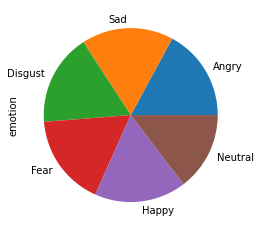

In [14]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie') 

In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['mfcc'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

7442


mfcc
0  [-18.468584, -20.254374, -20.04526, -19.794085...
1  [-21.58118, -18.51611, -16.883614, -17.155048,...
2  [-17.71445, -17.28498, -16.014097, -16.553043,...
3  [-18.93934, -20.214577, -18.278427, -17.682793...
4  [-20.4068, -16.727484, -15.03398, -13.564312, ...

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['mfcc'].values.tolist())],axis=1)
df[:5]


labels source  ...        257        258
0     Fear  CREMA  ...        NaN        NaN
1    Angry  CREMA  ...        NaN        NaN
2    Happy  CREMA  ...        NaN        NaN
3  Disgust  CREMA  ... -20.222849 -22.439045
4      Sad  CREMA  ...        NaN        NaN

[5 rows x 262 columns]

In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(7442, 262)


labels source  ...        257        258
0     Fear  CREMA  ...   0.000000   0.000000
1    Angry  CREMA  ...   0.000000   0.000000
2    Happy  CREMA  ...   0.000000   0.000000
3  Disgust  CREMA  ... -20.222849 -22.439045
4      Sad  CREMA  ...   0.000000   0.000000

[5 rows x 262 columns]

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[15:70]

0          1          2    ...        256        257        258
51   -18.811003 -17.791302 -17.157402  ...   0.000000   0.000000   0.000000
1499 -14.245870 -16.312931 -19.356106  ...   0.000000   0.000000   0.000000
1109 -20.010965 -18.804390 -18.666359  ...   0.000000   0.000000   0.000000
3794  -3.634196  -8.618714 -15.100697  ...   0.000000   0.000000   0.000000
6773 -19.063738 -19.369392 -19.669140  ...   0.000000   0.000000   0.000000
1783  -4.042523  -7.585166 -10.790105  ...   0.000000   0.000000   0.000000
3945 -15.622663 -18.291533 -18.973612  ...   0.000000   0.000000   0.000000
5441 -15.420179 -15.858257 -15.912089  ...   0.000000   0.000000   0.000000
5194 -17.326759 -17.302589 -16.837013  ...   0.000000   0.000000   0.000000
5798 -17.433519 -17.302814 -18.471317  ...   0.000000   0.000000   0.000000
6326 -20.986460 -20.633862 -20.211351  ...   0.000000   0.000000   0.000000
1650 -18.552402 -18.279501 -17.719532  ...   0.000000   0.000000   0.000000
6778 -22.290751 -19.331495 -18.092154  ...   0.000000   0.000000   0.000000
3279 -15.171559 -17.871767 -19.718288  ...   0.000000   0.000000   0.000000
3944 -16.669249 -16.294493 -17.334688  ...   0.000000   0.000000   0.000000
1864 -13.350750 -14.362017 -15.345415  ...   0.000000   0.000000   0.000000
1498 -17.358215 -16.040384 -17.362427  ...   0.000000   0.000000   0.000000
7074  -5.813799  -6.097371  -6.267408  ...   0.000000   0.000000   0.000000
3889 -17.866404 -16.011478 -15.609098  ...   0.000000   0.000000   0.000000
5776 -21.662535 -20.981842 -21.103638  ...   0.000000   0.000000   0.000000
3360 -17.539513 -16.536648 -16.476711  ...   0.000000   0.000000   0.000000
2510 -15.175882 -16.627695 -20.047558  ...   0.000000   0.000000   0.000000
7123 -14.779136 -15.477100 -17.556234  ...   0.000000   0.000000   0.000000
3439 -21.156557 -18.494658 -19.766478  ...   0.000000   0.000000   0.000000
6018 -21.942060 -18.780733 -17.860447  ... -19.654467 -18.178755 -17.304337
6480 -18.042803 -17.114452 -16.494465  ...   0.000000   0.000000   0.000000
705  -22.423513 -21.216400 -21.731411  ...   0.000000   0.000000   0.000000
1721 -19.341780 -17.860289 -18.549494  ...   0.000000   0.000000   0.000000
2925  -5.821209  -9.702796 -13.286549  ...   0.000000   0.000000   0.000000
4331 -16.726355 -17.406851 -16.111914  ...   0.000000   0.000000   0.000000
57   -21.992008 -21.062834 -19.253410  ...   0.000000   0.000000   0.000000
3148 -19.566952 -17.371155 -16.695803  ...   0.000000   0.000000   0.000000
6795 -17.891697 -17.477360 -19.395548  ...   0.000000   0.000000   0.000000
527  -18.290806 -18.472422 -15.951435  ...   0.000000   0.000000   0.000000
3428 -11.459333 -12.237931 -14.461018  ...   0.000000   0.000000   0.000000
5162 -13.035252 -11.928488 -14.038736  ...   0.000000   0.000000   0.000000
565  -15.622674 -15.061488 -13.518463  ...   0.000000   0.000000   0.000000
1978 -14.663593 -15.794937 -18.543613  ...   0.000000   0.000000   0.000000
4610 -19.103909 -17.633253 -19.394335  ...   0.000000   0.000000   0.000000
640  -12.159023 -12.386531 -12.273381  ...   0.000000   0.000000   0.000000
2119 -17.504225 -18.094593 -18.780119  ...   0.000000   0.000000   0.000000
2283  -9.877584 -12.383633 -16.651020  ...   0.000000   0.000000   0.000000
730  -20.532499 -17.367205 -17.481779  ...   0.000000   0.000000   0.000000
6473 -18.003273 -17.238310 -17.966516  ...   0.000000   0.000000   0.000000
4587 -19.931854 -18.336456 -19.496229  ...   0.000000   0.000000   0.000000
7365  -7.992880  -8.635421 -13.664506  ...   0.000000   0.000000   0.000000
2473 -20.325441 -19.720364 -20.459341  ...   0.000000   0.000000   0.000000
325  -25.118345 -23.888893 -26.167950  ...   0.000000   0.000000   0.000000
2287 -15.065157 -14.669376 -14.889579  ...   0.000000   0.000000   0.000000
290  -19.846901 -19.243498 -18.556486  ...   0.000000   0.000000   0.000000
6034 -14.870115 -16.246788 -15.903032  ...   0.000000   0.000000   0.000000
2392 -10.321326 -10.714808 -13.264727  ...   0.000000   0.00

In [ ]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df, test_size=0.20, random_state=0)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
(5953, 259, 1)
(1489, 259, 1)


(7442, 6)

In [ ]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(12, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.

Epoch 00773: val_accuracy did not improve from 0.54399
Epoch 774/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.1459 - accuracy: 0.6411 - val_loss: 1.7758 - val_accuracy: 0.5171

Epoch 00774: val_accuracy did not improve from 0.54399
Epoch 775/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.1144 - accuracy: 0.6421 - val_loss: 1.8326 - val_accuracy: 0.5212

Epoch 00775: val_accuracy did not improve from 0.54399
Epoch 776/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.1636 - accuracy: 0.6304 - val_loss: 1.7030 - val_accuracy: 0.5373

Epoch 00776: val_accuracy did not improve from 0.54399
Epoch 777/1000
117/117 [==============================] - 2s 20ms/step - loss: 1.1298 - accuracy: 0.6371 - val_loss: 1.7284 - val_accuracy: 0.5292

Epoch 00777: val_accuracy did not improve from 0.54399
Epoch 778/1000
117/117 [==============================] - 2s 20ms/step - loss: 1.

47/47 [==============================] - 0s 6ms/step - loss: 1.5759 - accuracy: 0.6125
Loss of the model is -  1.5759215354919434
47/47 [==============================] - 0s 5ms/step - loss: 1.5759 - accuracy: 0.6125
Accuracy of the model is -  61.24916076660156 %


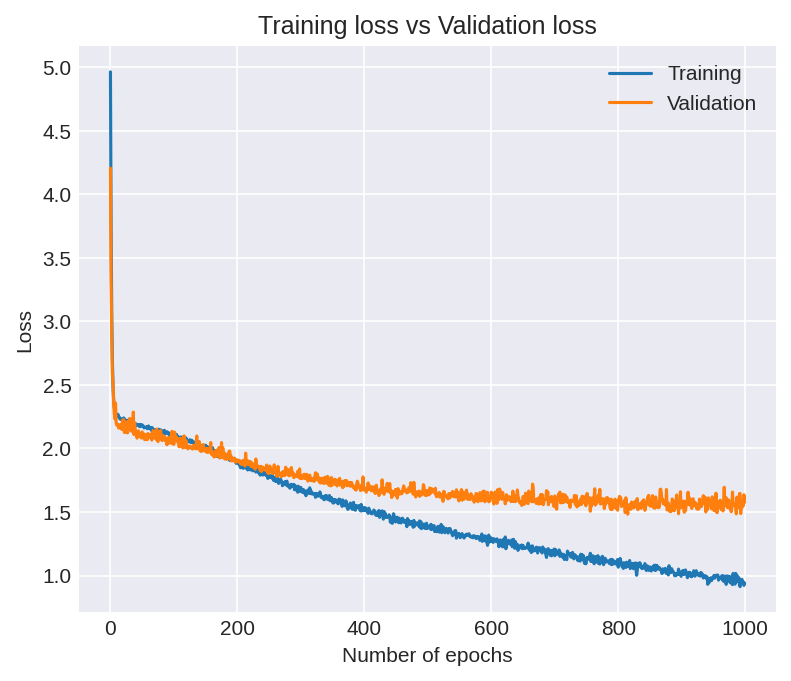

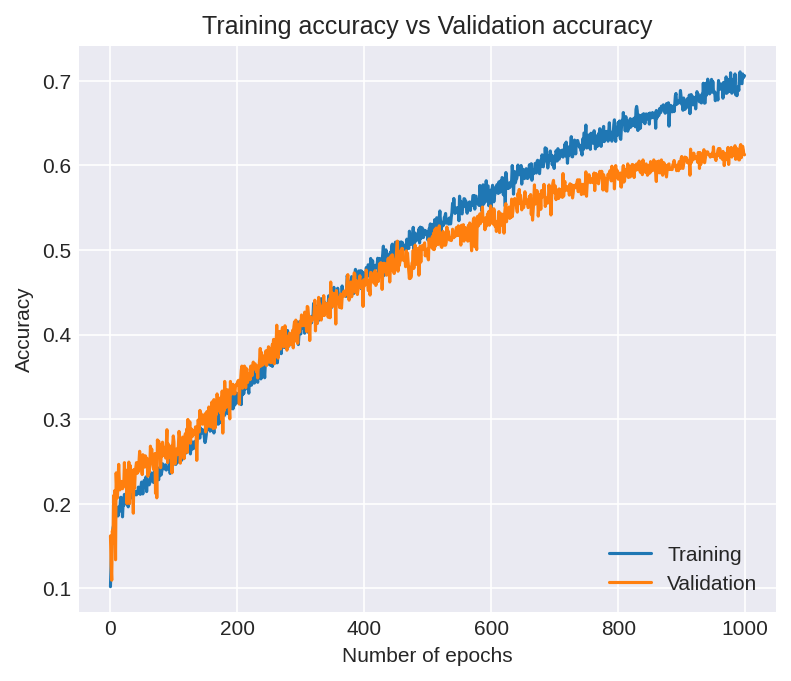

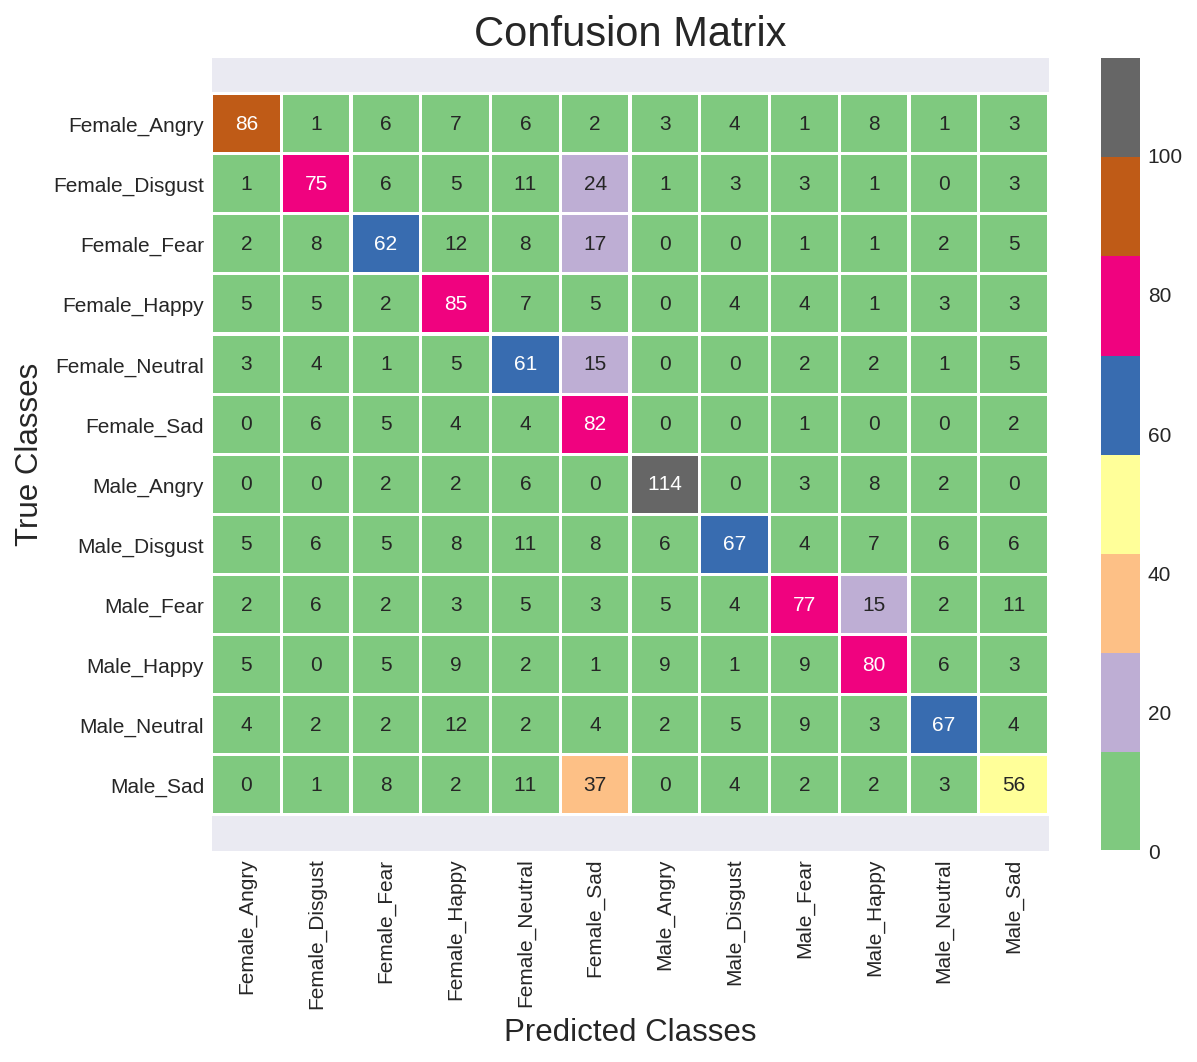

                precision    recall  f1-score   support

  Female_Angry       0.76      0.67      0.71       128
Female_Disgust       0.66      0.56      0.61       133
   Female_Fear       0.58      0.53      0.55       118
  Female_Happy       0.55      0.69      0.61       124
Female_Neutral       0.46      0.62      0.52        99
    Female_Sad       0.41      0.79      0.54       104
    Male_Angry       0.81      0.83      0.82       137
  Male_Disgust       0.73      0.48      0.58       139
     Male_Fear       0.66      0.57      0.61       135
    Male_Happy       0.62      0.62      0.62       130
  Male_Neutral       0.72      0.58      0.64       116
      Male_Sad       0.55      0.44      0.49       126

      accuracy                           0.61      1489
     macro avg       0.63      0.61      0.61      1489
  weighted avg       0.64      0.61      0.61      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 200 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Female_Angry', 'Female_Disgust', 'Female_Fear', 'Female_Happy','Female_Neutral', 'Female_Sad', 'Male_Angry', 'Male_Disgust','Male_Fear', 'Male_Happy', 'Male_Neutral', 'Male_Sad']))

In [ ]:
# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'True Values': TRUE})

# COMBINE PREDICTION AND TRUE LABELS
finaldf = TRUE.join(predictions)
finaldf[100:150] 

True Values Predicted Values
100  Female_Disgust  Female_Disgust 
101  Female_Fear     Female_Fear    
102  Female_Fear     Female_Neutral 
103  Female_Sad      Female_Sad     
104  Female_Sad      Male_Fear      
105  Female_Fear     Female_Neutral 
106  Female_Angry    Female_Angry   
107  Male_Disgust    Male_Disgust   
108  Male_Disgust    Male_Disgust   
109  Female_Happy    Female_Happy   
110  Male_Disgust    Male_Disgust   
111  Male_Disgust    Female_Neutral 
112  Male_Angry      Male_Angry     
113  Male_Fear       Male_Sad       
114  Male_Neutral    Male_Neutral   
115  Male_Happy      Male_Happy     
116  Male_Sad        Male_Sad       
117  Female_Neutral  Female_Neutral 
118  Female_Angry    Female_Happy   
119  Female_Fear     Female_Fear    
120  Male_Sad        Female_Sad     
121  Female_Sad      Female_Sad     
122  Female_Fear     Female_Fear    
123  Male_Fear       Female_Sad     
124  Male_Fear       Male_Fear      
125  Male_Sad        Female_Fear    
126  Male_Angry      Male_Angry     
127  Female_Disgust  Female_Sad     
128  Male_Angry      Male_Angry     
129  Male_Disgust    Female_Happy   
130  Female_Sad      Female_Neutral 
131  Male_Sad        Female_Sad     
132  Male_Sad        Male_Happy     
133  Male_Angry      Male_Angry     
134  Female_Angry    Female_Angry   
135  Female_Disgust  Female_Disgust 
136  Female_Happy    Female_Neutral 
137  Female_Fear     Male_Fear      
138  Female_Fear     Female_Fear    
139  Male_Sad        Male_Sad       
140  Male_Fear       Male_Angry     
141  Male_Angry      Male_Fear      
142  Male_Angry      Male_Angry     
143  Male_Disgust    Male_Sad       
144  Female_Sad      Female_Fear    
145  Male_Happy      Male_Happy     
146  Male_Disgust    Female_Sad     
147  Male_Sad        Male_Sad       
148  Male_Sad        Female_Sad     
149  Male_Sad        Female_Neutral

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

                precision    recall  f1-score   support

  Female_Angry       0.21      0.20      0.21       128
Female_Disgust       0.20      0.19      0.20       133
   Female_Fear       0.10      0.09      0.10       118
  Female_Happy       0.08      0.07      0.07       124
Female_Neutral       0.14      0.13      0.14        99
    Female_Sad       0.19      0.27      0.22       104
    Male_Angry       0.48      0.59      0.53       137
  Male_Disgust       0.10      0.11      0.11       139
     Male_Fear       0.10      0.09      0.10       135
    Male_Happy       0.26      0.31      0.28       130
  Male_Neutral       0.15      0.09      0.12       116
      Male_Sad       0.13      0.13      0.13       126

      accuracy                           0.19      1489
     macro avg       0.18      0.19      0.18      1489
  weighted avg       0.18      0.19      0.19      1489

----accuracy score 19.274680993955677 ----


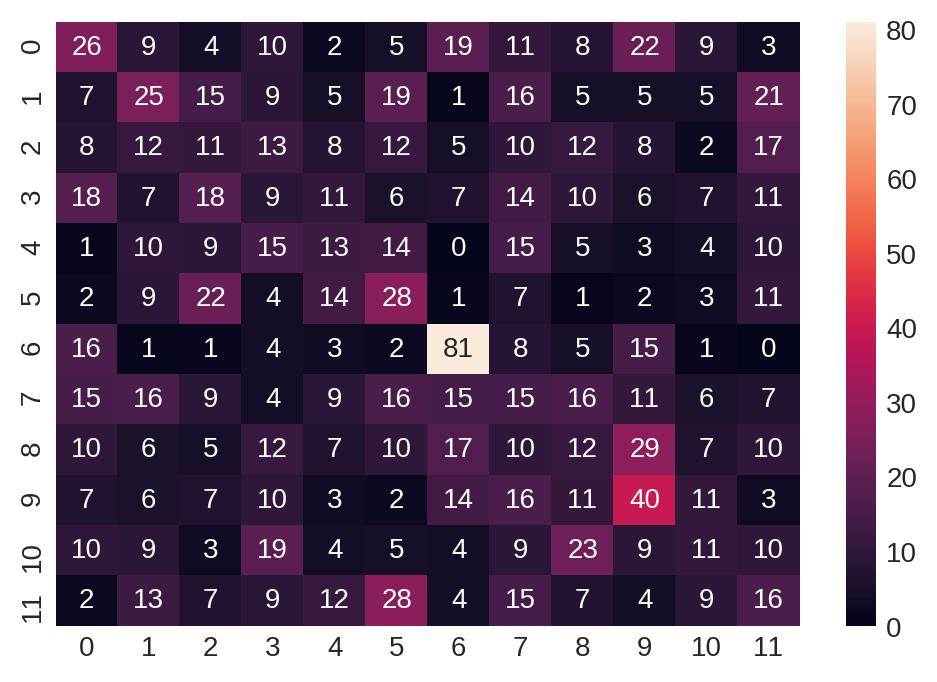

----train accuracy score 37.34251637829666 ----
----test accuracy score 19.274680993955677 ----


In [ ]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

Accuracy: 20.95%
                precision    recall  f1-score   support

  Female_Angry       0.27      0.18      0.22       128
Female_Disgust       0.21      0.08      0.12       133
   Female_Fear       0.07      0.02      0.03       118
  Female_Happy       0.12      0.08      0.10       124
Female_Neutral       0.08      0.11      0.09        99
    Female_Sad       0.22      0.55      0.31       104
    Male_Angry       0.40      0.61      0.48       137
  Male_Disgust       0.11      0.09      0.10       139
     Male_Fear       0.18      0.20      0.19       135
    Male_Happy       0.25      0.25      0.25       130
  Male_Neutral       0.16      0.12      0.14       116
      Male_Sad       0.17      0.24      0.20       126

      accuracy                           0.21      1489
     macro avg       0.19      0.21      0.19      1489
  weighted avg       0.19      0.21      0.19      1489

                precision    recall  f1-score   support

  Female_Angry       0.27  

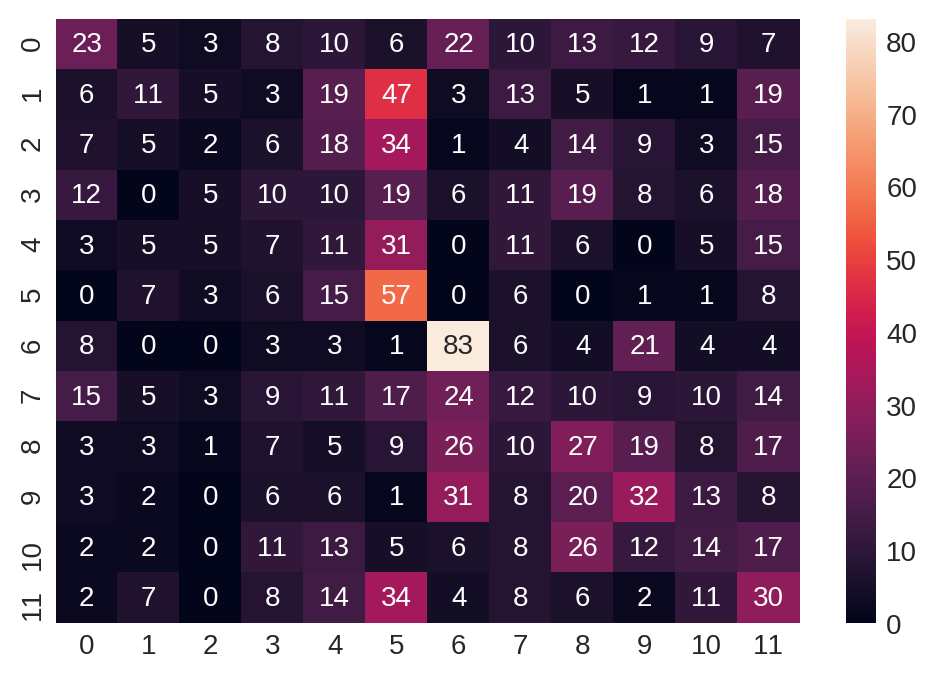

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(512,), learning_rate='adaptive', max_iter=500)

# Train the model
model.fit(X_train,y_train)

# Predict for the test set
y_pred=model.predict(X_test)

# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(12, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Sgd',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 773/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0031 - accuracy: 0.6729 - val_loss: 1.9355 - val_accuracy: 0.5641

Epoch 00773: val_accuracy did not improve from 0.56951
Epoch 774/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0206 - accuracy: 0.6701 - val_loss: 1.9578 - val_accuracy: 0.5635

Epoch 00774: val_accuracy did not improve from 0.56951
Epoch 775/1000
117/117 [==============================] - 2s 20ms/step - loss: 1.0280 - accuracy: 0.6626 - val_loss: 1.9027 - val_accuracy: 0.5682

Epoch 00775: val_accuracy did not improve from 0.56951
Epoch 776/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0426 - accuracy: 0.6605 - val_loss: 1.8704 - val_accuracy: 0.5702

Epoch 00776: val_accuracy improved from 0.56951 to 0.57018, saving model to SER_best_initial_model.hdf5
Epoch 777/1000
117/117 [==============================] - 2s 19ms/step - loss: 1.0144 - 

47/47 [==============================] - 0s 6ms/step - loss: 1.9307 - accuracy: 0.6293
Loss of the model is -  1.9306786060333252
47/47 [==============================] - 0s 5ms/step - loss: 1.9307 - accuracy: 0.6293
Accuracy of the model is -  62.92814016342163 %


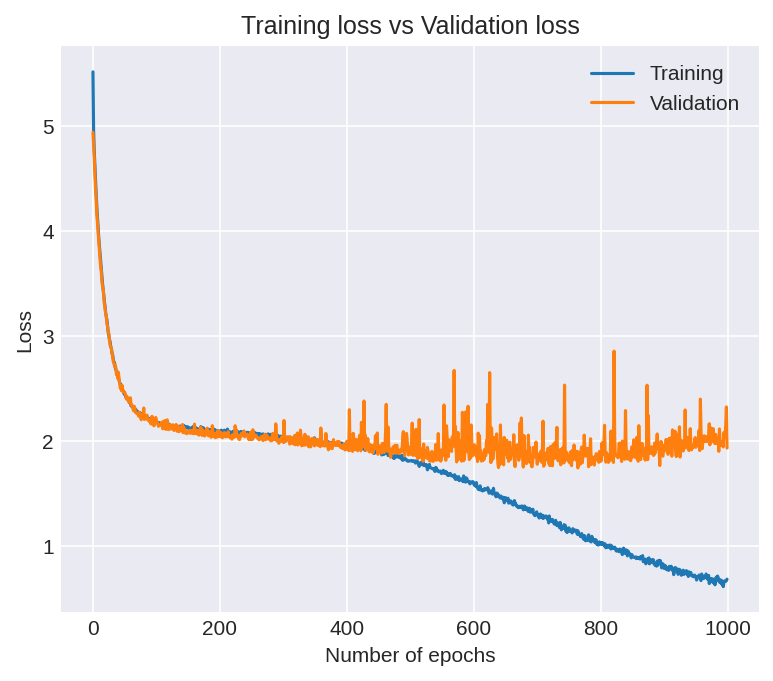

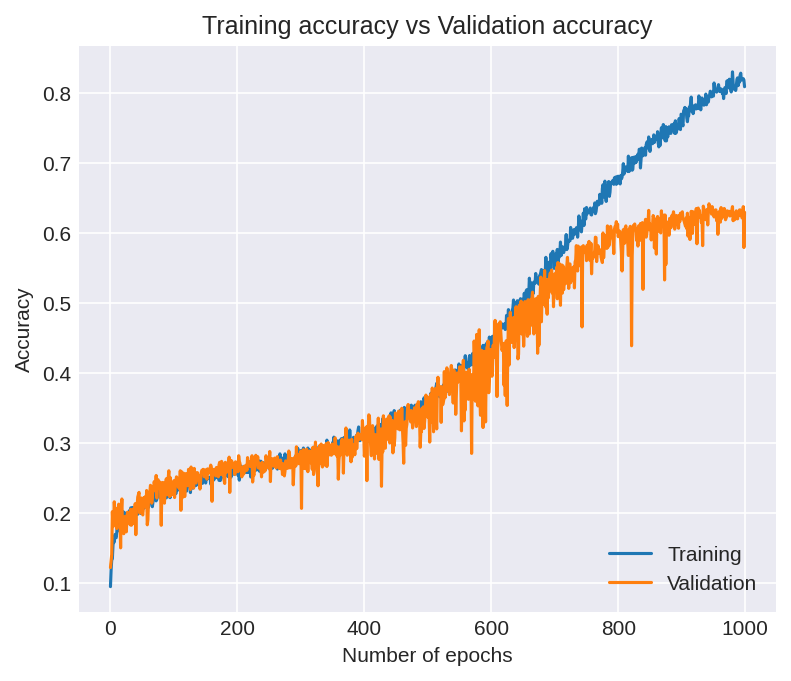

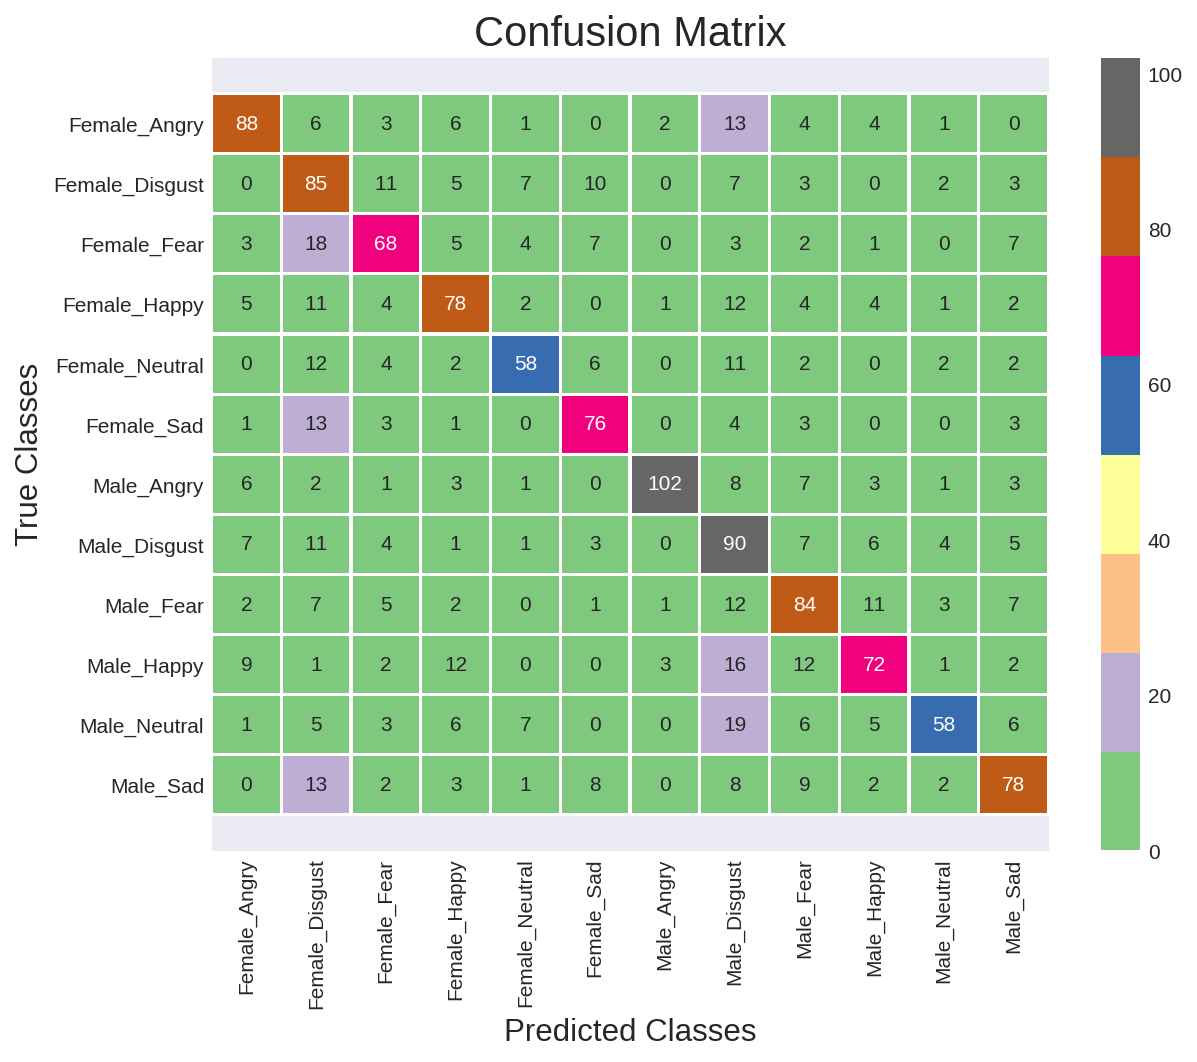

                precision    recall  f1-score   support

  Female_Angry       0.72      0.69      0.70       128
Female_Disgust       0.46      0.64      0.54       133
   Female_Fear       0.62      0.58      0.60       118
  Female_Happy       0.63      0.63      0.63       124
Female_Neutral       0.71      0.59      0.64        99
    Female_Sad       0.68      0.73      0.71       104
    Male_Angry       0.94      0.74      0.83       137
  Male_Disgust       0.44      0.65      0.53       139
     Male_Fear       0.59      0.62      0.60       135
    Male_Happy       0.67      0.55      0.61       130
  Male_Neutral       0.77      0.50      0.61       116
      Male_Sad       0.66      0.62      0.64       126

      accuracy                           0.63      1489
     macro avg       0.66      0.63      0.64      1489
  weighted avg       0.65      0.63      0.63      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Female_Angry', 'Female_Disgust', 'Female_Fear', 'Female_Happy','Female_Neutral', 'Female_Sad', 'Male_Angry', 'Male_Disgust','Male_Fear', 'Male_Happy', 'Male_Neutral', 'Male_Sad']))

In [ ]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd 
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df_mel))
df_mel.head()

7442


mel_spectrogram
0  [-43.254665, -41.894707, -41.50736, -41.845905, -41.429436, -41.245266, -41.361217, -41.227703, -40.461845, -41.412804, -40.846268, -41.3623, -41.832153, -41.681538, -41.29523, -41.154045, -41.41264, -41.244602, -41.98202, -42.75347, -41.39226, -41.348686, -41.4379, -41.160706, -40.68711, -40.217934, -40.00573, -40.61248, -41.625732, -42.034603, -36.170002, -29.743038, -28.243929, -28.24998, -27.77547, -27.573372, -26.677956, -27.175388, -25.75104, -25.647913, -25.644295, -26.668339, -26.613882, -26.356556, -26.77386, -27.072065, -26.074293, -24.921244, -24.15235, -24.197945, -24.11029, -23.707932, -22.837158, -23.120525, -24.53285, -25.841347, -26.868448, -29.331154, -27.962044, -24.725094, -23.502502, -23.915518, -23.807484, -23.29895, -23.742783, -23.666122, -24.211384, -25.644524, -26.583113, -26.444763, -27.152815, -27.83554, -27.551153, -28.68049, -29.932323, -32.111633, -34.198128, -34.29514, -30.36183, -28.504137, -26.403248, -24.029825, -22.023685, -20.688402, -21.068415, -22.280832, -22.060638, -22.541868, -21.63682, -20.952768, -20.330608, -20.08736, -18.601715, -17.550812, -17.681398, -17.489412, -18.064072, -18.179367, -19.748005, -22.72484, ...]  
1  [-40.019615, -39.31888, -39.904377, -40.02183, -39.7744, -40.8256, -40.82349, -40.737755, -41.057842, -40.740757, -40.136665, -40.028328, -40.117958, -40.572502, -40.300655, -35.24541, -24.305656, -15.054026, -8.955327, -2.7201383, 0.27744636, -1.0039458, -4.1437182, -4.1187983, -3.8420486, -1.933307, -0.75382155, -2.0139916, -0.75526005, 0.047777623, -0.30212802, -1.1874824, -3.6547902, -6.1316867, -8.452853, -11.30334, -14.004723, -16.084105, -16.540083, -17.778452, -19.796635, -21.605957, -24.498129, -27.230345, -29.728199, -32.176083, -34.456665, -36.28285, -37.400898, -25.947212, -18.187666, -14.398182, -14.629947, -15.888034, -16.673199, -18.4791, -20.681215, -21.648506, -18.917936, -15.50431, -13.40712, -14.367907, -15.239616, -16.649841, -19.669367, -22.478567, -20.777355, -18.29374, -19.09197, -20.22023, -21.741661, -22.996912, -23.304562, -23.409668, -23.84636, -24.02098, -24.215906, -24.407848, -24.27158, -24.928518, -24.936184, -24.48702, -24.364403, -24.350449, -24.19308, -24.501657, -23.709763, -22.201773, -19.272923, -14.294683, -8.977521, -6.6504035, -2.879748, 0.39416853, 1.0489246, 1.3469497, 2.1773577, 1.1921353, -0.12913948, -1.9220965, ...]
2  [-15.580318, -15.911305, -17.518682, -19.048752, -19.429144, -16.564928, -14.74183, -14.812408, -14.376028, -13.032358, -14.965805, -17.70784, -18.401854, -18.235233, -19.405958, -20.558506, -21.887682, -22.177513, -22.965317, -23.708618, -24.430075, -25.152124, -26.091549, -27.673948, -29.468325, -30.421167, -31.037094, -24.765696, -19.497751, -12.414918, -7.563994, -5.362314, -4.4883647, -4.7024994, -5.8331637, -7.090183, -7.846556, -7.5027804, -8.487026, -9.828499, -12.006524, -14.435906, -16.7812, -19.036343, -21.555477, -24.318964, -26.88568, -29.030516, -30.30815, -30.67237, -26.97263, -25.407276, -24.284609, -20.942827, -19.638956, -19.041725, -17.656258, -17.25342, -17.436552, -18.236567, -19.620573, -20.720694, -21.78866, -22.698328, -24.438408, -25.903013, -26.853199, -27.082697, -25.182755, -21.599602, -16.753698, -13.096713, -11.33063, -9.949519, -9.123485, -10.370833, -11.907258, -12.728574, -13.230368, -12.4921875, -11.962813, -11.424604, -11.453296, -12.781526, -14.5663, -14.857618, -16.093336, -16.725306, -15.981659, -15.181727, -11.775486, -8.407348, -8.23784, -8.301277, -6.5105953, -7.8583894, -8.832267, -9.019757, -11.017051, -12.65295, ...] 
3  [-40.956226, -40.079308, -39.446255, -39.76058, -40.143784, -41.29259, -40.380424, -40.26122, -40.638493, -40.964264, -40.928825, -41.187588, -41.057316, -41.34997, -41.327923, -41.84959, -41.73394, -40.820457, -41.046894, -41.37823, -41.581783, -41.257427, -41.459835, -41.81283, -41.993954, -42.28176, -42.14926, -35.91385, -29.323515, -26.782314, -25.163727, -24.740639, -24.7201, -25.553753, -27.333067, -28.155083, -27.908997, 

In [ ]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

labels source  ...        257        258
0  Male_Fear     CREMA  ... NaN        NaN       
1  Female_Angry  CREMA  ... NaN        NaN       
2  Female_Happy  CREMA  ... NaN        NaN       
3  Male_Disgust  CREMA  ... -41.103497 -42.741512
4  Female_Sad    CREMA  ... NaN        NaN       

[5 rows x 262 columns]

In [ ]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(7442, 262)


labels source  ...        257        258
0  Male_Fear     CREMA  ...  0.000000   0.000000 
1  Female_Angry  CREMA  ...  0.000000   0.000000 
2  Female_Happy  CREMA  ...  0.000000   0.000000 
3  Male_Disgust  CREMA  ... -41.103497 -42.741512
4  Female_Sad    CREMA  ...  0.000000   0.000000 

[5 rows x 262 columns]

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2  ...        256        257        258
5501 -18.653603 -20.926130 -25.372904  ... -36.901680 -36.276054 -36.322926
5842 -42.069279 -41.364258 -41.220829  ...  0.000000   0.000000   0.000000 
4041 -41.999790 -41.009239 -41.232838  ...  0.000000   0.000000   0.000000 
577  -45.973854 -45.210159 -46.185856  ... -45.379429 -45.424423 -43.917522
59   -9.225361  -6.596142  -4.009823   ...  0.000000   0.000000   0.000000 
5265 -42.308147 -36.104568 -25.804382  ...  0.000000   0.000000   0.000000 
787  -4.395832  -5.497263  -7.251527   ...  0.000000   0.000000   0.000000 
7403 -14.935475 -15.246476 -17.224049  ...  0.000000   0.000000   0.000000 
4738 -23.530272 -21.452641 -19.456417  ...  0.000000   0.000000   0.000000 
2024 -31.404991 -31.610317 -32.172379  ...  0.000000   0.000000   0.000000 

[10 rows x 259 columns]

In [ ]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)



[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
(5953, 259, 1)
(1489, 259, 1)


In [ ]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(512, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(6, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 772/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 2.6024 - val_accuracy: 0.6320

Epoch 00772: val_accuracy did not improve from 0.65212
Epoch 773/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 3.1747 - val_accuracy: 0.6347

Epoch 00773: val_accuracy did not improve from 0.65212
Epoch 774/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0244 - accuracy: 0.9947 - val_loss: 3.1275 - val_accuracy: 0.6414

Epoch 00774: val_accuracy did not improve from 0.65212
Epoch 775/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0139 - accuracy: 0.9944 - val_loss: 2.5682 - val_accuracy: 0.6286

Epoch 00775: val_accuracy did not improve from 0.65212
Epoch 776/1000
117/117 [==============================] - 4s 37ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 2.8771 - val_accurac

In [ ]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

47/47 [==============================] - 1s 11ms/step - loss: 2.4629 - accuracy: 0.6629
Loss of the model is -  2.4629039764404297
47/47 [==============================] - 1s 11ms/step - loss: 2.4629 - accuracy: 0.6629
Accuracy of the model is -  66.28609895706177 %


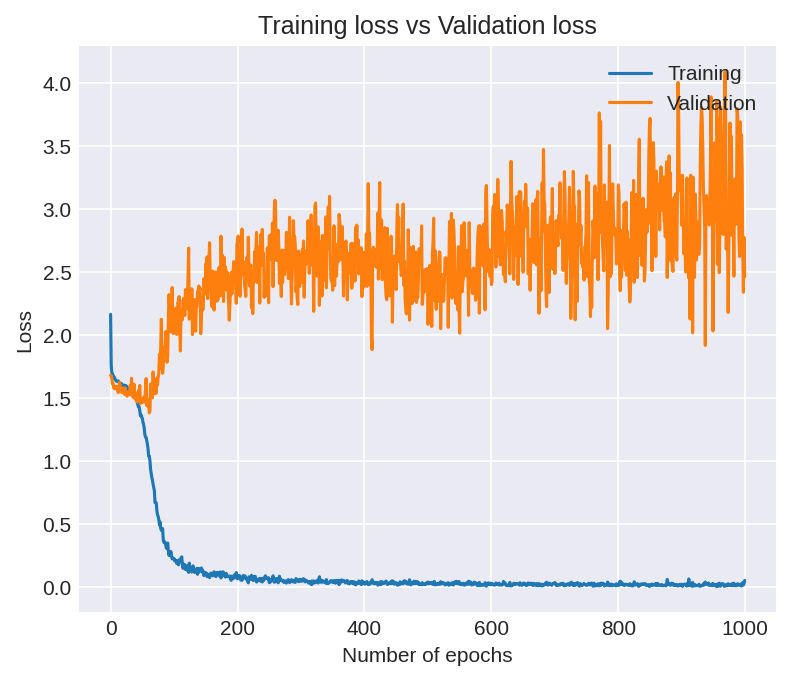

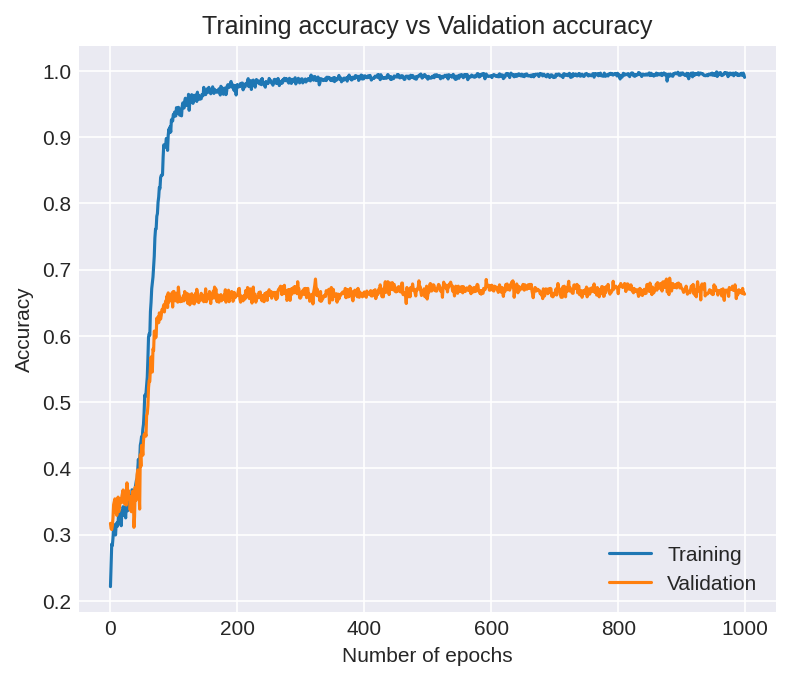

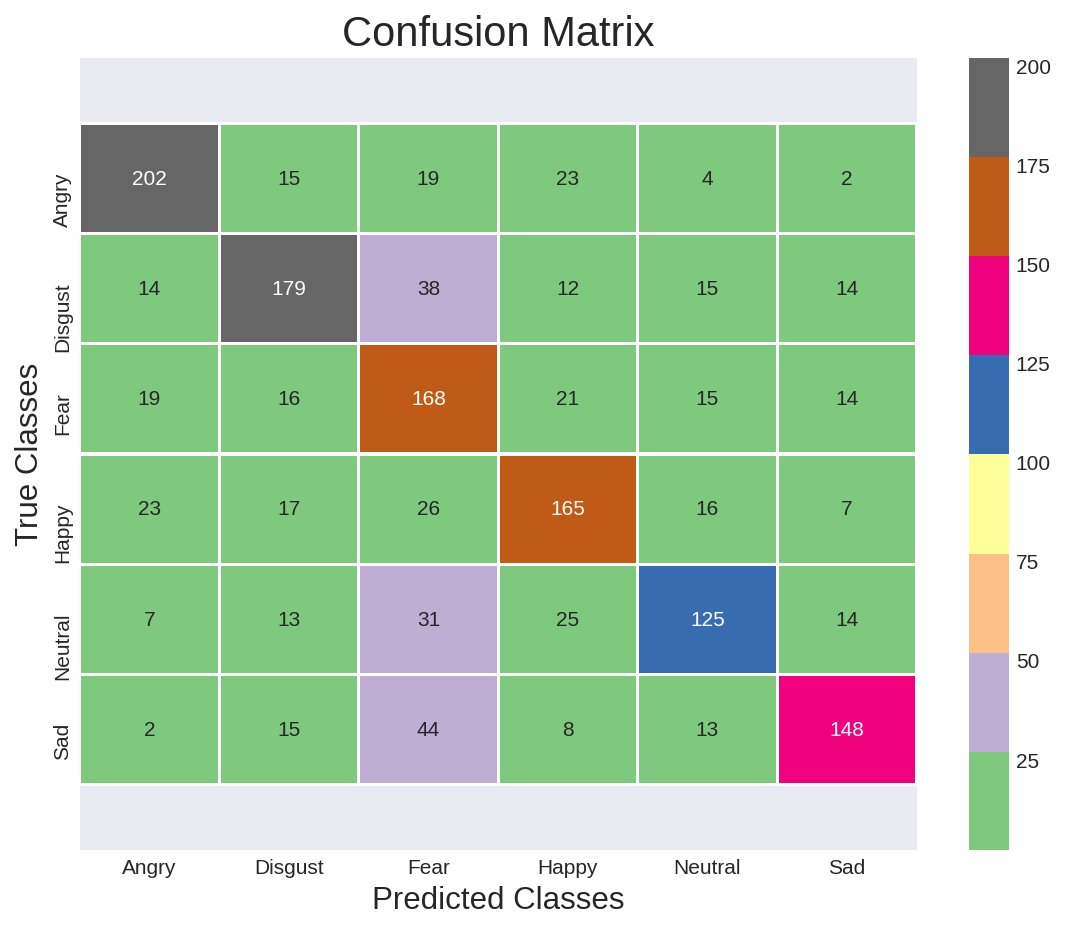

              precision    recall  f1-score   support

       Angry       0.76      0.76      0.76       265
     Disgust       0.70      0.66      0.68       272
        Fear       0.52      0.66      0.58       253
       Happy       0.65      0.65      0.65       254
     Neutral       0.66      0.58      0.62       215
         Sad       0.74      0.64      0.69       230

    accuracy                           0.66      1489
   macro avg       0.67      0.66      0.66      1489
weighted avg       0.67      0.66      0.66      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']))

In [ ]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  model = tf.keras.Sequential()
  model.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,activation='relu',dilation_rate=1))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
  model.add(layers.MaxPooling1D(pool_size=(2)))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(6, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
  model.summary()
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
  model_history=model.fit(inputs[train], targets[train],batch_size=32, epochs=1000, validation_data=(X_test, y_test),callbacks=[checkpoint])
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  # Increase fold number
  fold_no = fold_no + 1
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Streaming output truncated to the last 5000 lines.
Epoch 772/1000
117/117 [==============================] - 2s 17ms/step - loss: 0.0297 - accuracy: 0.9950 - val_loss: 3.1078 - val_accuracy: 0.6602

Epoch 00772: val_accuracy did not improve from 0.68099
Epoch 773/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0242 - accuracy: 0.9938 - val_loss: 2.9654 - val_accuracy: 0.6602

Epoch 00773: val_accuracy did not improve from 0.68099
Epoch 774/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0149 - accuracy: 0.9964 - val_loss: 2.7991 - val_accuracy: 0.6615

Epoch 00774: val_accuracy did not improve from 0.68099
Epoch 775/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 2.9792 - val_accuracy: 0.6588

Epoch 00775: val_accuracy did not improve from 0.68099
Epoch 776/1000
117/117 [==============================] - 2s 16ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 3.4048 - val_accurac

47/47 [==============================] - 0s 6ms/step - loss: 3.3200 - accuracy: 0.6662
Loss of the model is -  3.3200013637542725
47/47 [==============================] - 0s 5ms/step - loss: 3.3200 - accuracy: 0.6662
Accuracy of the model is -  66.62189364433289 %


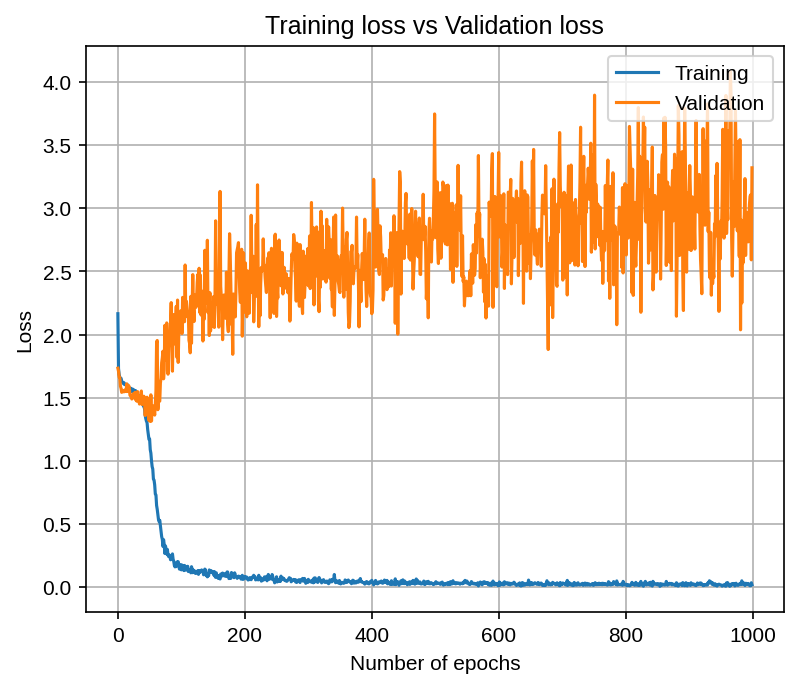

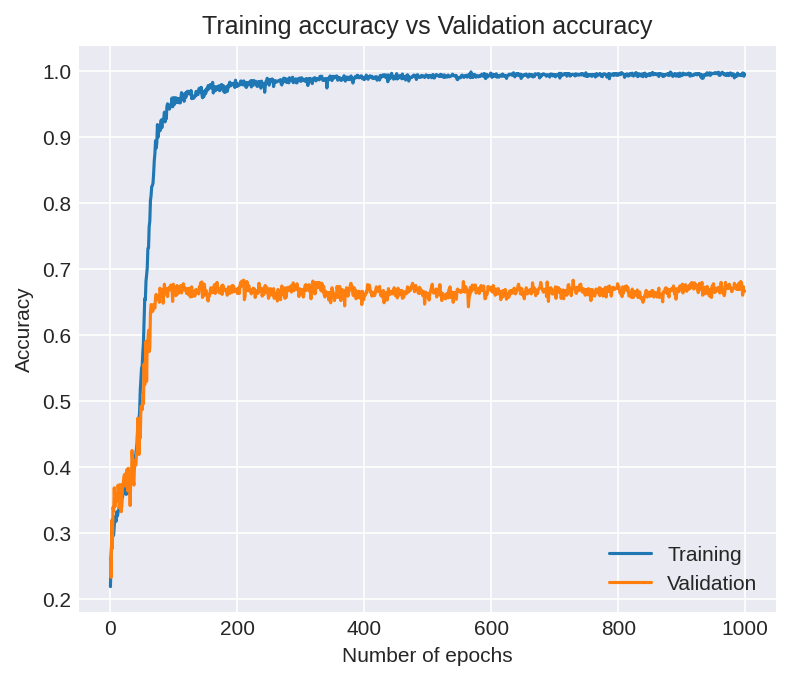

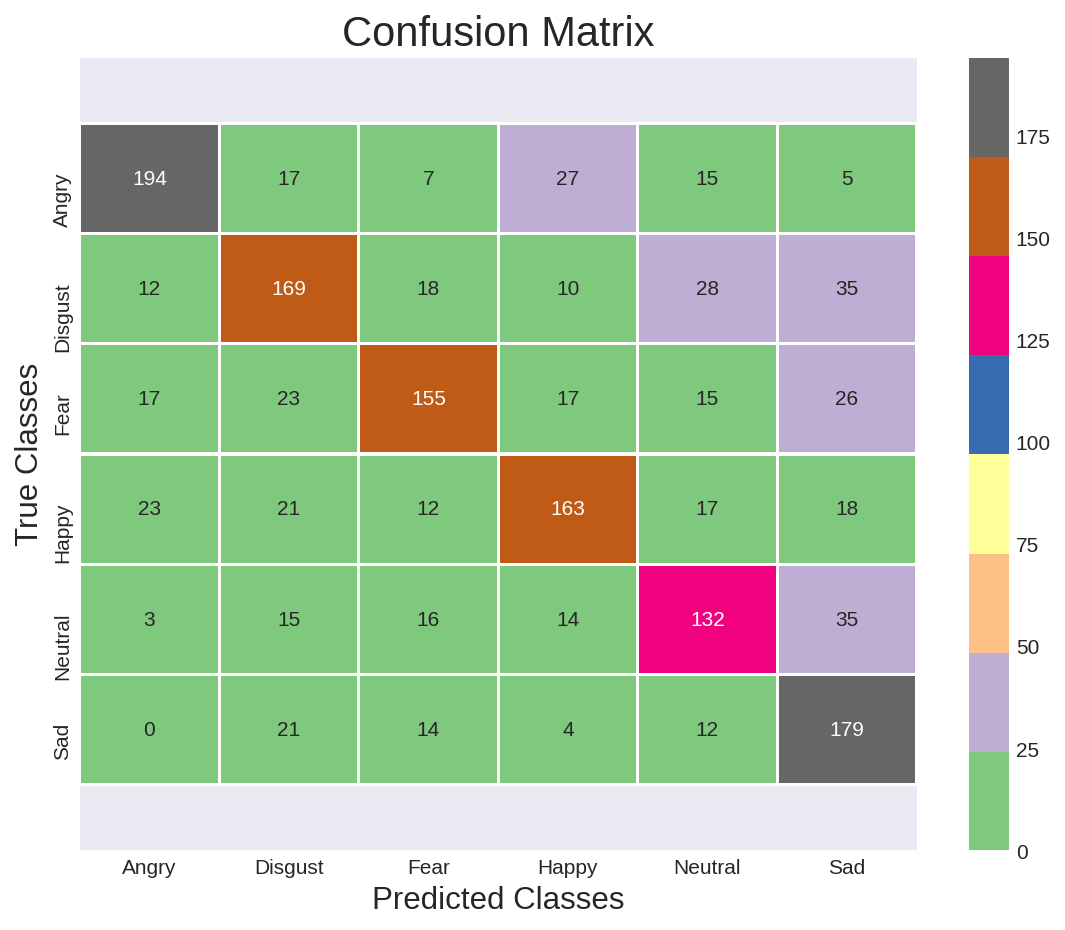

              precision    recall  f1-score   support

       Angry       0.78      0.73      0.75       265
     Disgust       0.64      0.62      0.63       272
        Fear       0.70      0.61      0.65       253
       Happy       0.69      0.64      0.67       254
     Neutral       0.60      0.61      0.61       215
         Sad       0.60      0.78      0.68       230

    accuracy                           0.67      1489
   macro avg       0.67      0.67      0.66      1489
weighted avg       0.67      0.67      0.67      1489



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(6,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(6,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])     
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(X_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[40:50] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9, 7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()   
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']))

In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD':
        emotion.append('Sad')
    elif part[2] == 'ANG' :
        emotion.append('Angry')
    elif part[2] == 'DIS' :
        emotion.append('Disgust')
    elif part[2] == 'FEA' :
        emotion.append('Fear')
    elif part[2] == 'HAP' :
        emotion.append('Happy')
    elif part[2] == 'NEU':
        emotion.append('Neutral')
    else:
        emotion.append('Unknown_Emotion')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['emotion'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.emotion.value_counts()

Fear       1271
Happy      1271
Sad        1271
Disgust    1271
Angry      1271
Neutral    1087
Name: emotion, dtype: int64

In [15]:
data_path = pd.concat([CREMA_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

emotion  ...                                                                                         path
0  Fear     ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_DFA_FEA_XX.wav
1  Angry    ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_TIE_ANG_XX.wav
2  Happy    ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_TIE_HAP_XX.wav
3  Disgust  ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1080_DFA_DIS_XX.wav
4  Sad      ...  /content/drive/MyDrive/Speech Emotion analysis/Crema-D Dataset/AudioWAV/1079_WSI_SAD_XX.wav

[5 rows x 3 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


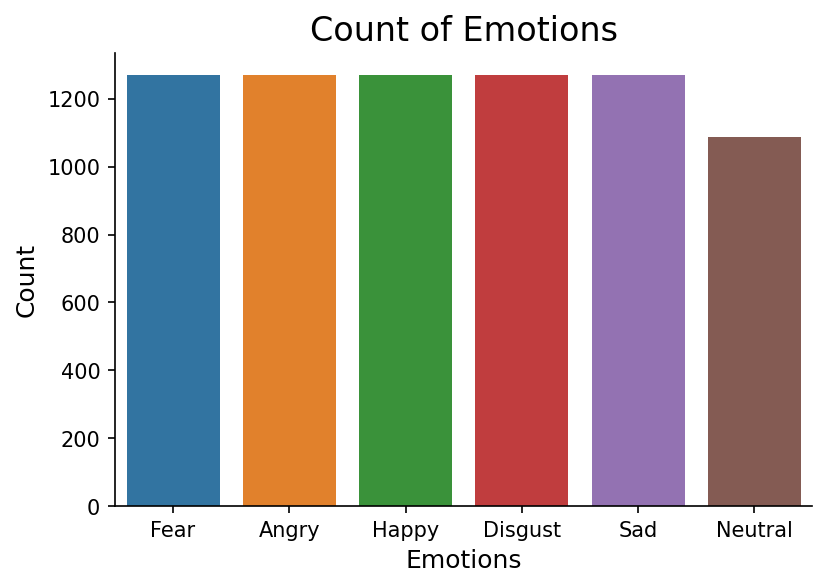

In [17]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show() 
plt.rcParams['figure.dpi'] = 150

In [18]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [19]:
def noise(data):
    noise_amp = 0.025*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [21]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
       
    return result

In [22]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [23]:
X, Y = [], []
for path, emotion in zip(CREMA_df.path, CREMA_df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


In [24]:
len(X), len(Y), data_path.path.shape

(22326, 22326, (7442,))

In [25]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2  ...           153           154  labels
0  0.081004  0.696072  0.638123  ...  1.338177e-10  1.322255e-10  Fear  
1  0.186507  0.815315  0.800410  ...  6.063310e-04  6.378418e-04  Fear  
2  0.098362  0.718613  0.756271  ...  5.978356e-10  8.465281e-10  Fear  
3  0.126849  0.597284  0.585194  ...  1.024090e-08  1.004866e-08  Angry 
4  0.250231  0.698938  0.692034  ...  1.747295e-02  1.924227e-02  Angry 

[5 rows x 156 columns]

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
(17860, 155, 1)
(4466, 155, 1)


(22326, 6)

In [27]:
lb.classes_

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'],
      dtype=object)

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(64, kernel_size=(5),strides=1,dilation_rate=1,padding="same",activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(x_train, y_train,batch_size=32, epochs=1000, validation_data=(x_test, y_test),callbacks=[checkpoint])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 154, 256)          2304      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 147, 256)          524544    
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 73, 256)           0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 73, 256)           1024      
_________________________________________________________________
dropout_27 (Dropout)         (None, 73, 256)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 73, 256)           524544    
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 36, 256)          

140/140 [==============================] - 1s 5ms/step - loss: 1.3489 - accuracy: 0.7326
Loss of the model is -  1.3489056825637817
140/140 [==============================] - 1s 5ms/step - loss: 1.3489 - accuracy: 0.7326
Accuracy of the model is -  73.2646644115448 %


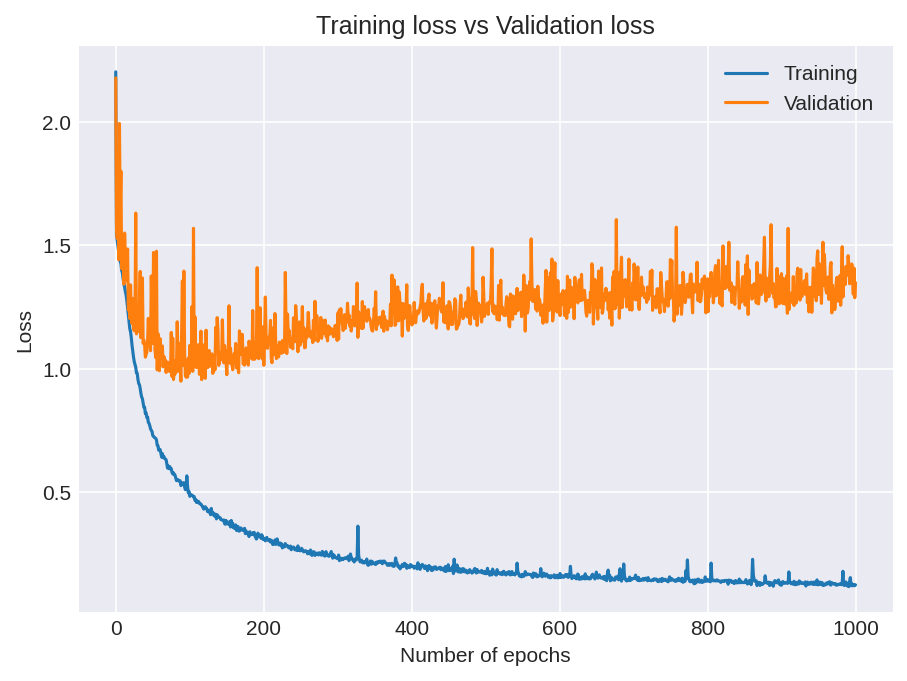

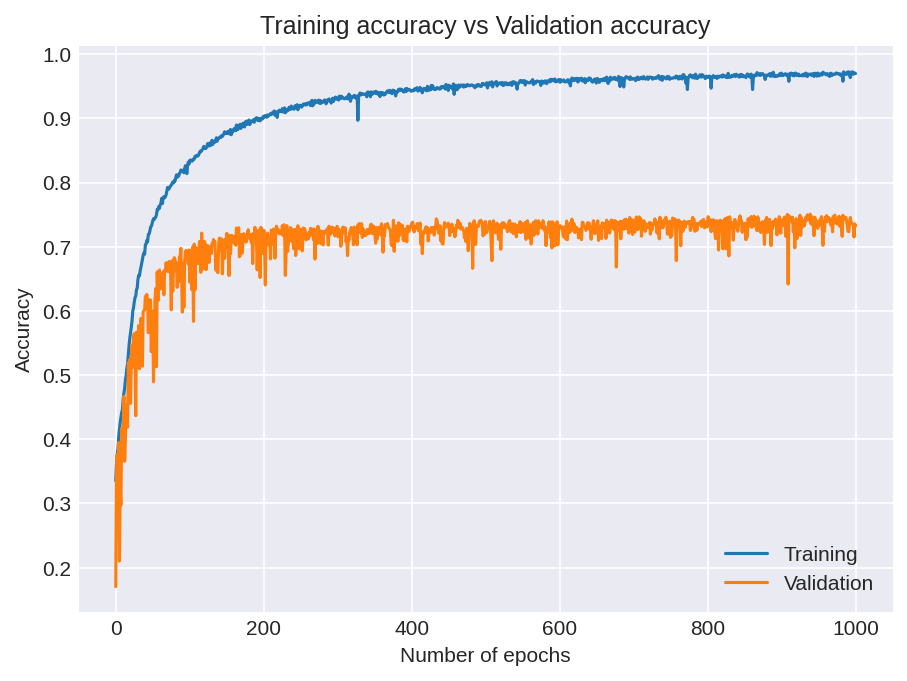

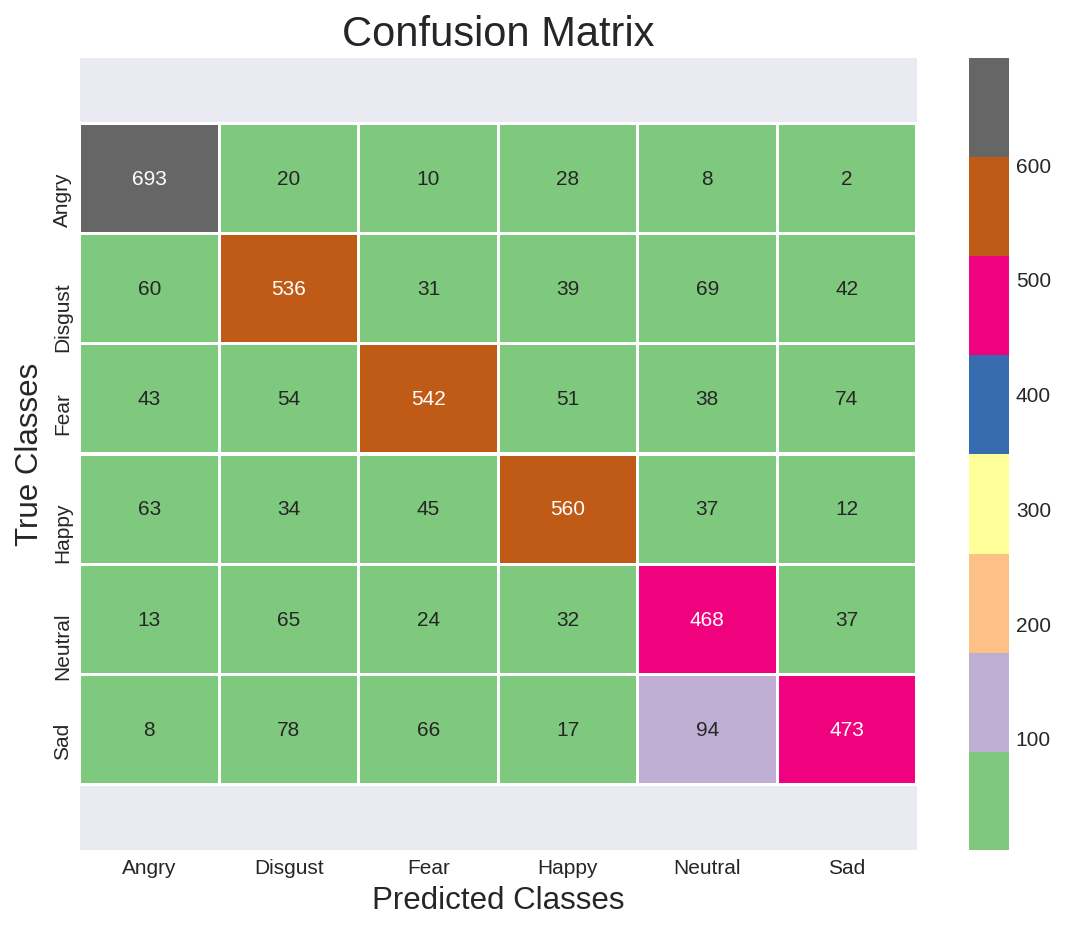

              precision    recall  f1-score   support

       Angry       0.79      0.91      0.84       761
     Disgust       0.68      0.69      0.69       777
        Fear       0.75      0.68      0.71       802
       Happy       0.77      0.75      0.76       751
     Neutral       0.66      0.73      0.69       639
         Sad       0.74      0.64      0.69       736

    accuracy                           0.73      4466
   macro avg       0.73      0.73      0.73      4466
weighted avg       0.73      0.73      0.73      4466



In [ ]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy','Neutral', 'Sad']))  

In [28]:
#ENSEMBLE

In [33]:
#MODEL-1
model1 = tf.keras.Sequential()
model1.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model1.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model1.add(layers.MaxPooling1D(pool_size=(2)))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.2))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(6, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model1.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model1.fit(x_train, y_train,batch_size=32, epochs=500, validation_data=(x_test, y_test),callbacks=[checkpoint])
model1.save('/content/drive/MyDrive/Speech Emotion analysis/model1-crema-d.hdf5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_36 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 37, 256)          

140/140 [==============================] - 1s 5ms/step - loss: 1.2430 - accuracy: 0.7159
Loss of the model is -  1.2429667711257935
140/140 [==============================] - 1s 4ms/step - loss: 1.2430 - accuracy: 0.7159
Accuracy of the model is -  71.58530950546265 %


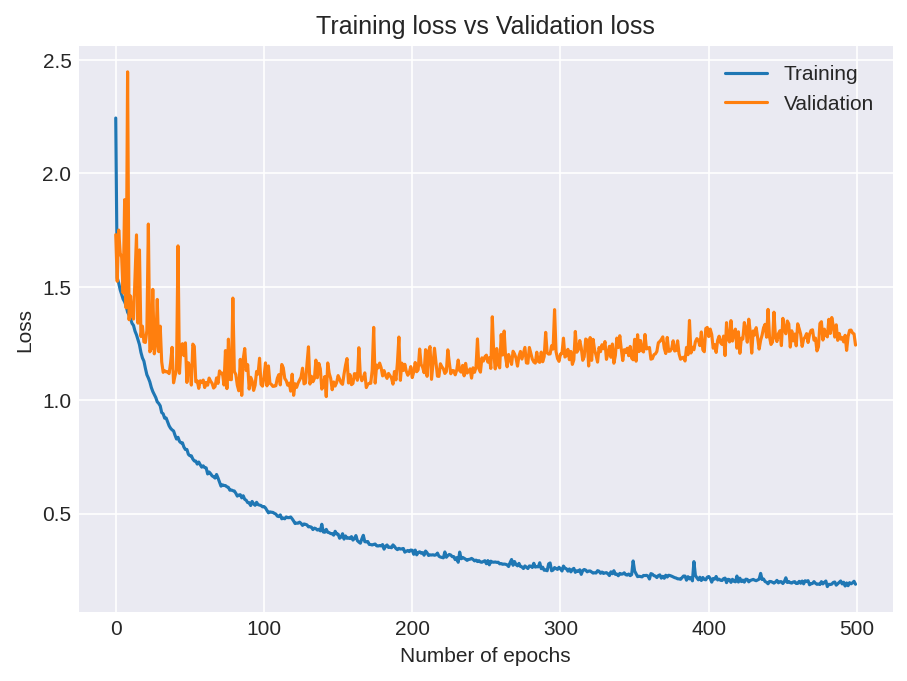

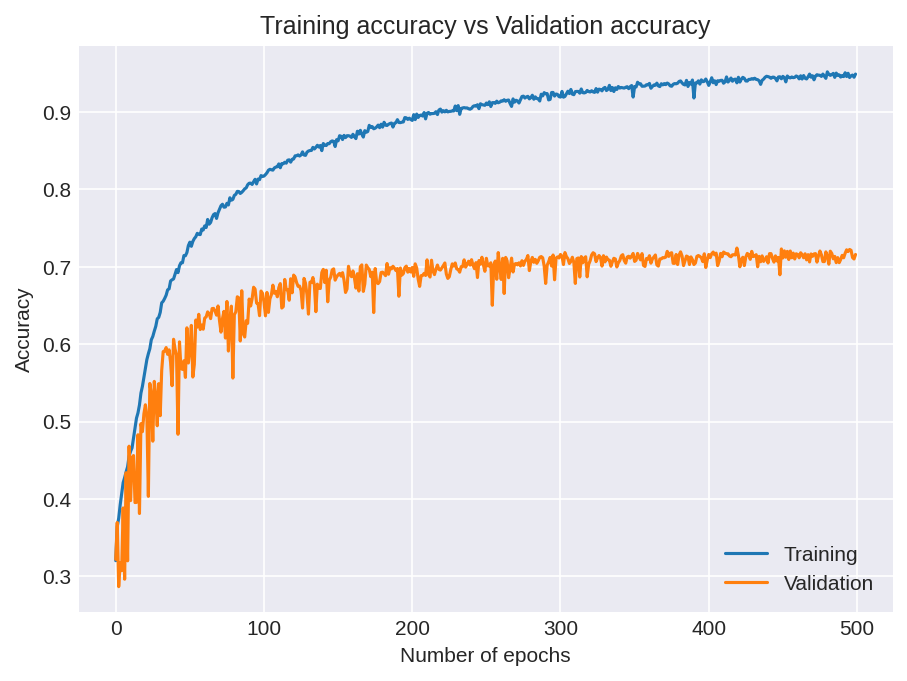

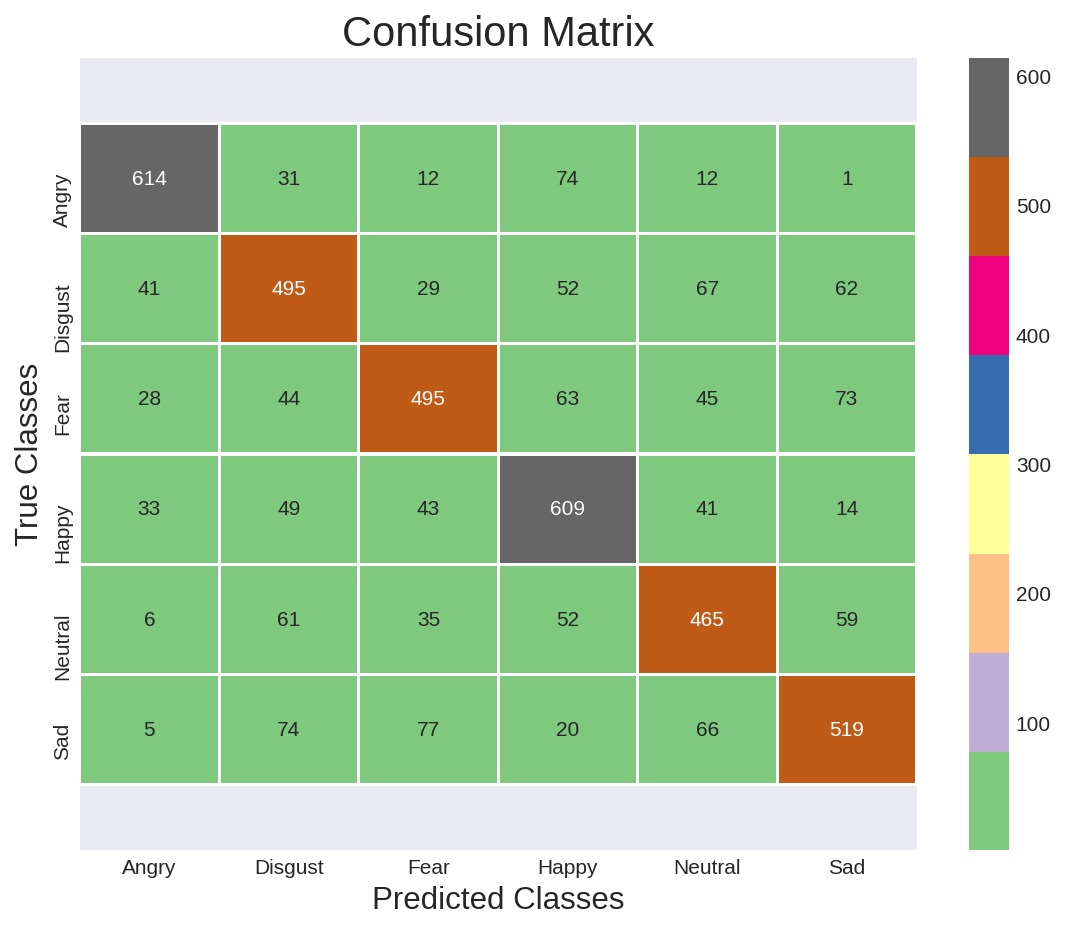

              precision    recall  f1-score   support

       Angry       0.84      0.83      0.83       744
     Disgust       0.66      0.66      0.66       746
        Fear       0.72      0.66      0.69       748
       Happy       0.70      0.77      0.73       789
     Neutral       0.67      0.69      0.68       678
         Sad       0.71      0.68      0.70       761

    accuracy                           0.72      4466
   macro avg       0.72      0.72      0.72      4466
weighted avg       0.72      0.72      0.72      4466



In [35]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy'] 
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model1.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model1.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model1.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy','Neutral', 'Sad']))  

In [36]:
#MODEL2
model2 = tf.keras.Sequential()
model2.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model2.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=(2)))
model2.add(BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.GRU(512))
model2.add(layers.Dropout(0.5))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model2.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model2.fit(x_train, y_train,batch_size=32, epochs=500, validation_data=(x_test, y_test),callbacks=[checkpoint])
model2.save('/content/drive/MyDrive/Speech Emotion analysis/model2-crema-d.hdf5') 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_45 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 37, 256)          

140/140 [==============================] - 1s 5ms/step - loss: 1.2336 - accuracy: 0.6335
Loss of the model is -  1.2336304187774658
140/140 [==============================] - 1s 5ms/step - loss: 1.2336 - accuracy: 0.6335
Accuracy of the model is -  63.345277309417725 %


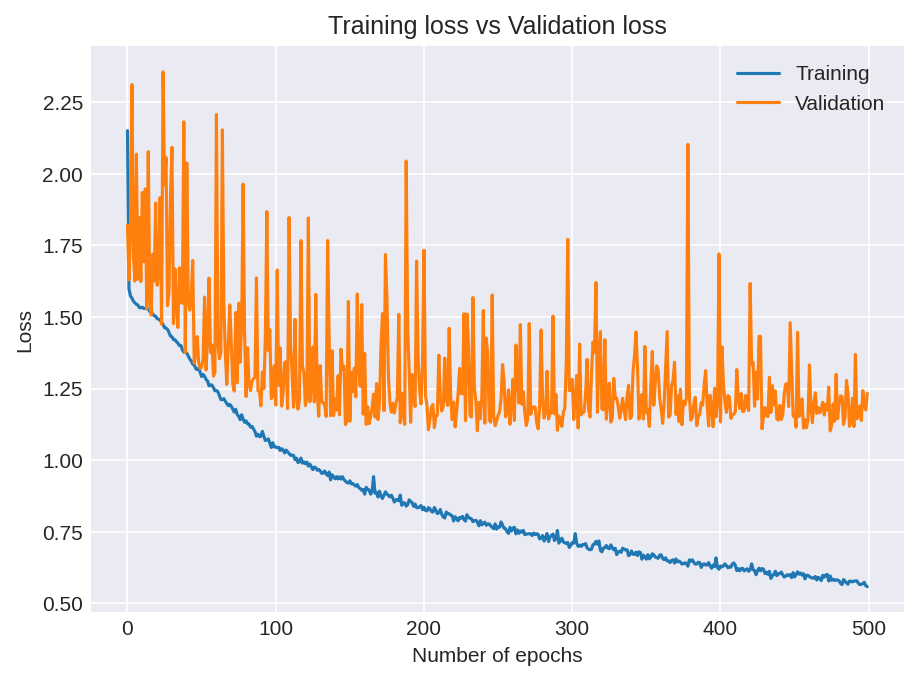

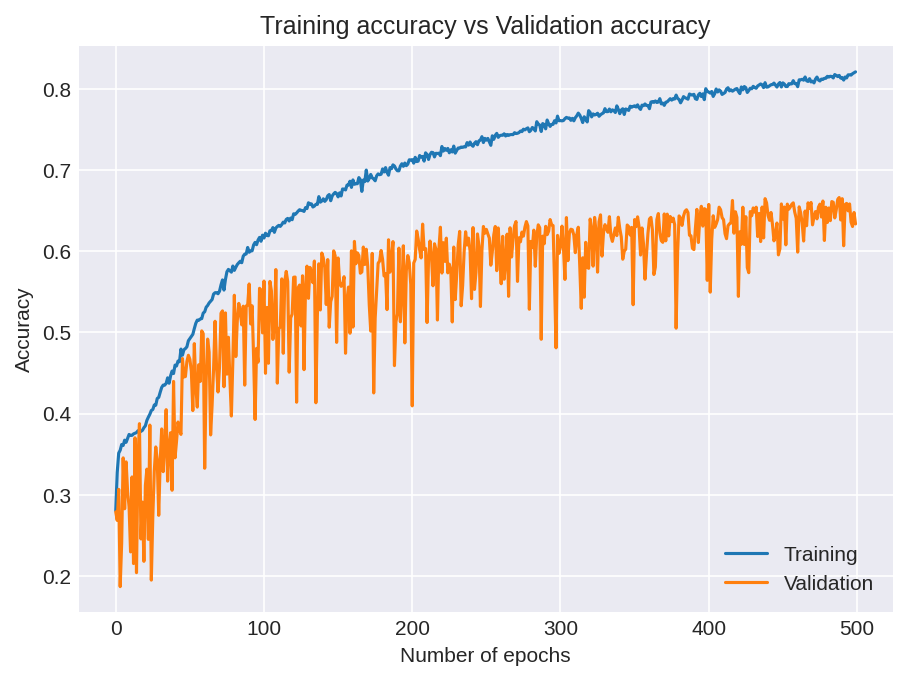

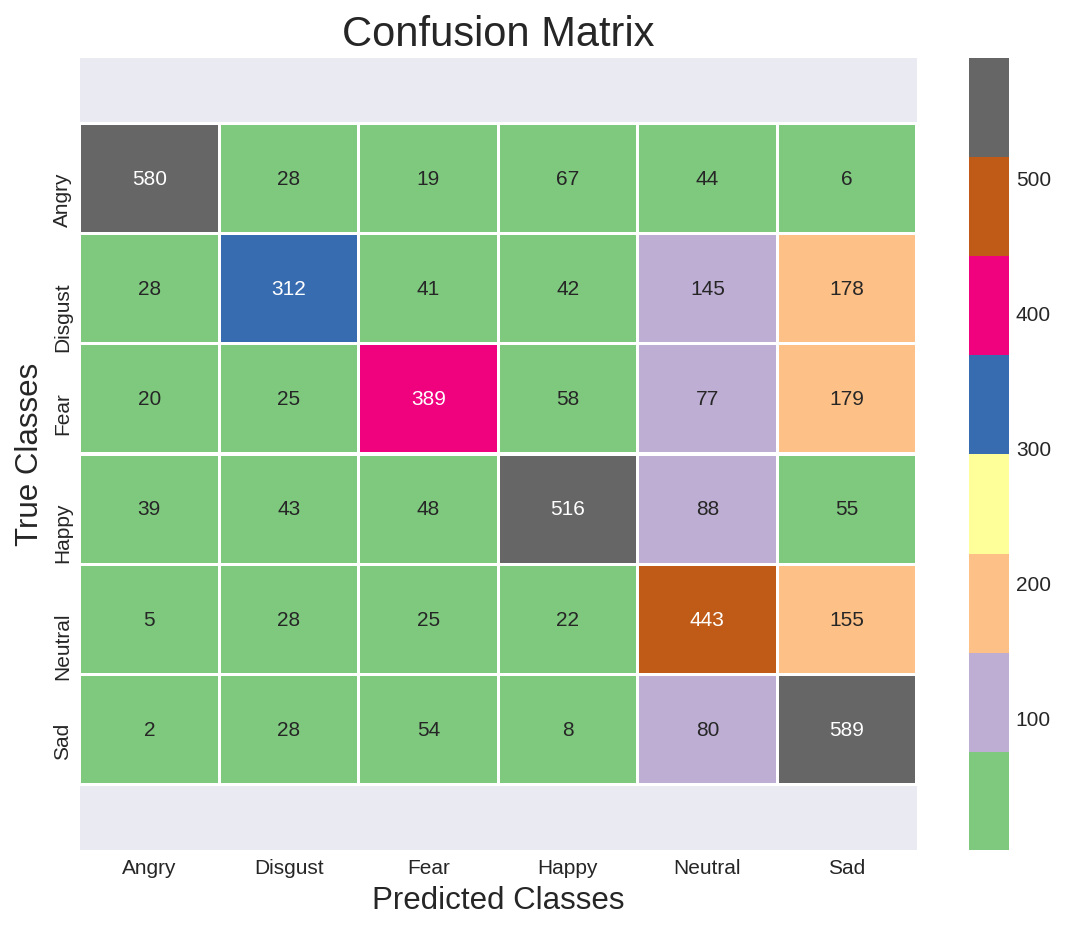

              precision    recall  f1-score   support

       Angry       0.86      0.78      0.82       744
     Disgust       0.67      0.42      0.52       746
        Fear       0.68      0.52      0.59       748
       Happy       0.72      0.65      0.69       789
     Neutral       0.51      0.65      0.57       678
         Sad       0.51      0.77      0.61       761

    accuracy                           0.63      4466
   macro avg       0.66      0.63      0.63      4466
weighted avg       0.66      0.63      0.63      4466



In [37]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model2.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model2.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model2.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy','Neutral', 'Sad']))  

In [38]:
#MODEL-3
model3 = tf.keras.Sequential()
model3.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same", activation='relu', input_shape=(x_train.shape[1],1)))
model3.add(layers.Conv1D(256, kernel_size=(8),strides=1,activation='relu',dilation_rate=1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv1D(128, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv1D(256, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv1D(64, kernel_size=(8),strides=1,dilation_rate=1,padding="same",activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=(2)))
model3.add(BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.LSTM(512))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(6, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model3.summary()
checkpoint = ModelCheckpoint("SER_best_initial_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model3.fit(x_train, y_train,batch_size=32, epochs=500, validation_data=(x_test, y_test),callbacks=[checkpoint])
model3.save('/content/drive/MyDrive/Speech Emotion analysis/model3-crema-d.hdf5')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 155, 256)          2304      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 148, 256)          524544    
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 74, 256)           0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 74, 256)           1024      
_________________________________________________________________
dropout_55 (Dropout)         (None, 74, 256)           0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 74, 256)           524544    
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 37, 256)          

140/140 [==============================] - 1s 5ms/step - loss: 1.2178 - accuracy: 0.6700
Loss of the model is -  1.21779465675354
140/140 [==============================] - 1s 5ms/step - loss: 1.2178 - accuracy: 0.6700
Accuracy of the model is -  66.99507236480713 %


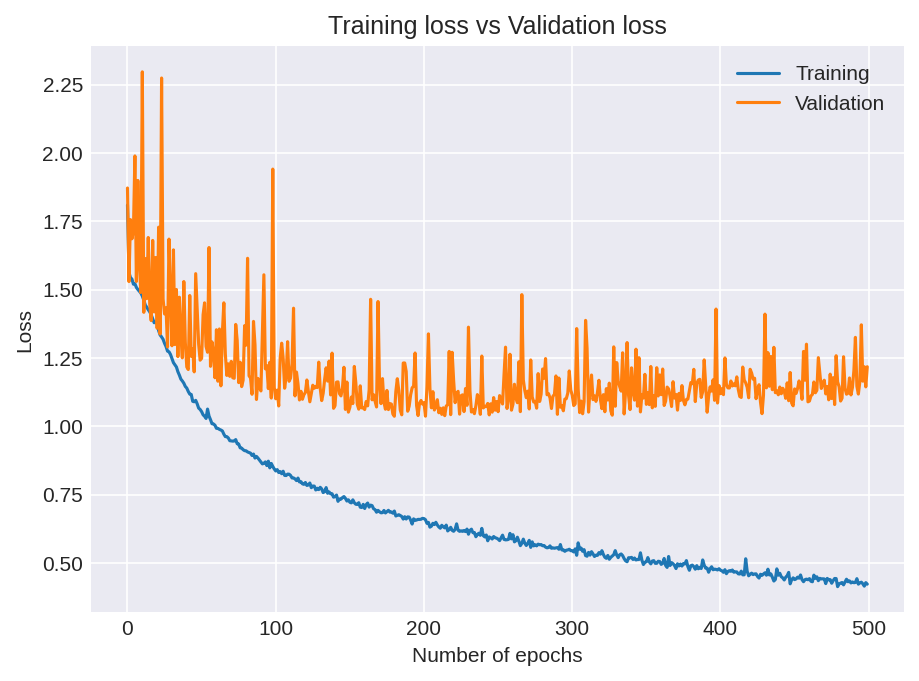

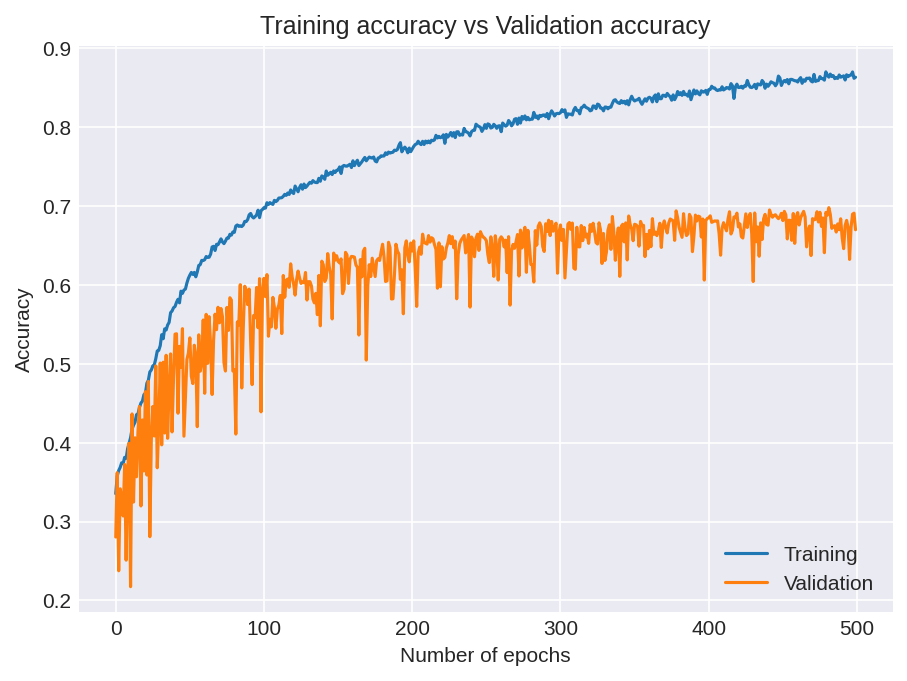

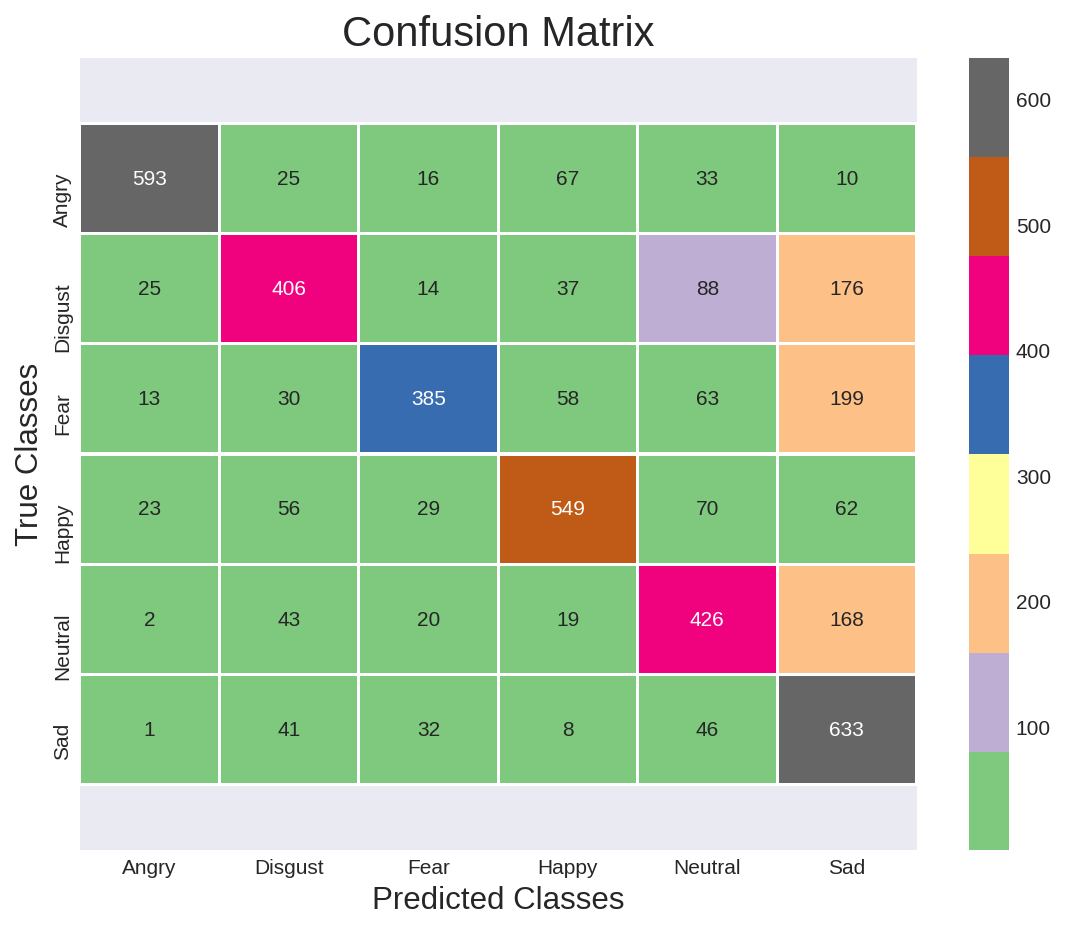

              precision    recall  f1-score   support

       Angry       0.90      0.80      0.85       744
     Disgust       0.68      0.54      0.60       746
        Fear       0.78      0.51      0.62       748
       Happy       0.74      0.70      0.72       789
     Neutral       0.59      0.63      0.61       678
         Sad       0.51      0.83      0.63       761

    accuracy                           0.67      4466
   macro avg       0.70      0.67      0.67      4466
weighted avg       0.70      0.67      0.67      4466



In [39]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
# Plot the results
train_loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
train_acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
plt.rcParams['figure.dpi'] = 150 
plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title('Training loss vs Validation loss')
plt.grid(True)
plt.legend(['Training','Validation'], loc=1)
plt.style.use(['seaborn-darkgrid'])

plt.rcParams['figure.dpi'] = 150 
plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.grid(True)
plt.legend(['Training','Validation'],loc=4)
plt.style.use(['seaborn-darkgrid'])      

# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model3.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model3.evaluate(x_test,y_test)[1]*100 , "%") 

# PREDICTION LABELS
predictions = model3.predict(x_test, batch_size=32)
predictions=predictions.argmax(axis=1)
predictions
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions}) 

# ACTUAL LABELS
TRUE = y_test.argmax(axis=1)
TRUE = TRUE.astype(int).flatten()
TRUE = (lb.inverse_transform((TRUE)))
TRUE = pd.DataFrame({'TRUE Values': TRUE})

# COMBINE PREDICTION AND ACTUAL LABELS
finaldf = TRUE.join(predictions)
finaldf[10:25] 
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION
cm = confusion_matrix(TRUE, predictions)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 150 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('Initial_Model_Confusion_Matrix-SGD-SPECTROGRAM.png')
plt.show() 
from sklearn.metrics import classification_report
print(classification_report(TRUE, predictions, target_names = ['Angry', 'Disgust', 'Fear', 'Happy','Neutral', 'Sad']))  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Score for model1 =  0.7158531124048365
Accuracy Score for model2 =  0.6334527541424093
Accuracy Score for model3 =  0.6699507389162561
Accuracy Score for average ensemble =  0.7136139722346619
Weighted average method
Accuracy Score for model1 =  0.7158531124048365
Accuracy Score for model2 =  0.6334527541424093
Accuracy Score for model3 =  0.6699507389162561
Accuracy Score for average ensemble =  0.7136139722346619
Accuracy Score for weighted average ensemble =  0.7196596506941334
Max accuracy of  72.45857590685178  obained with w1= 0.4  w2= 0.1  and w3= 0.3


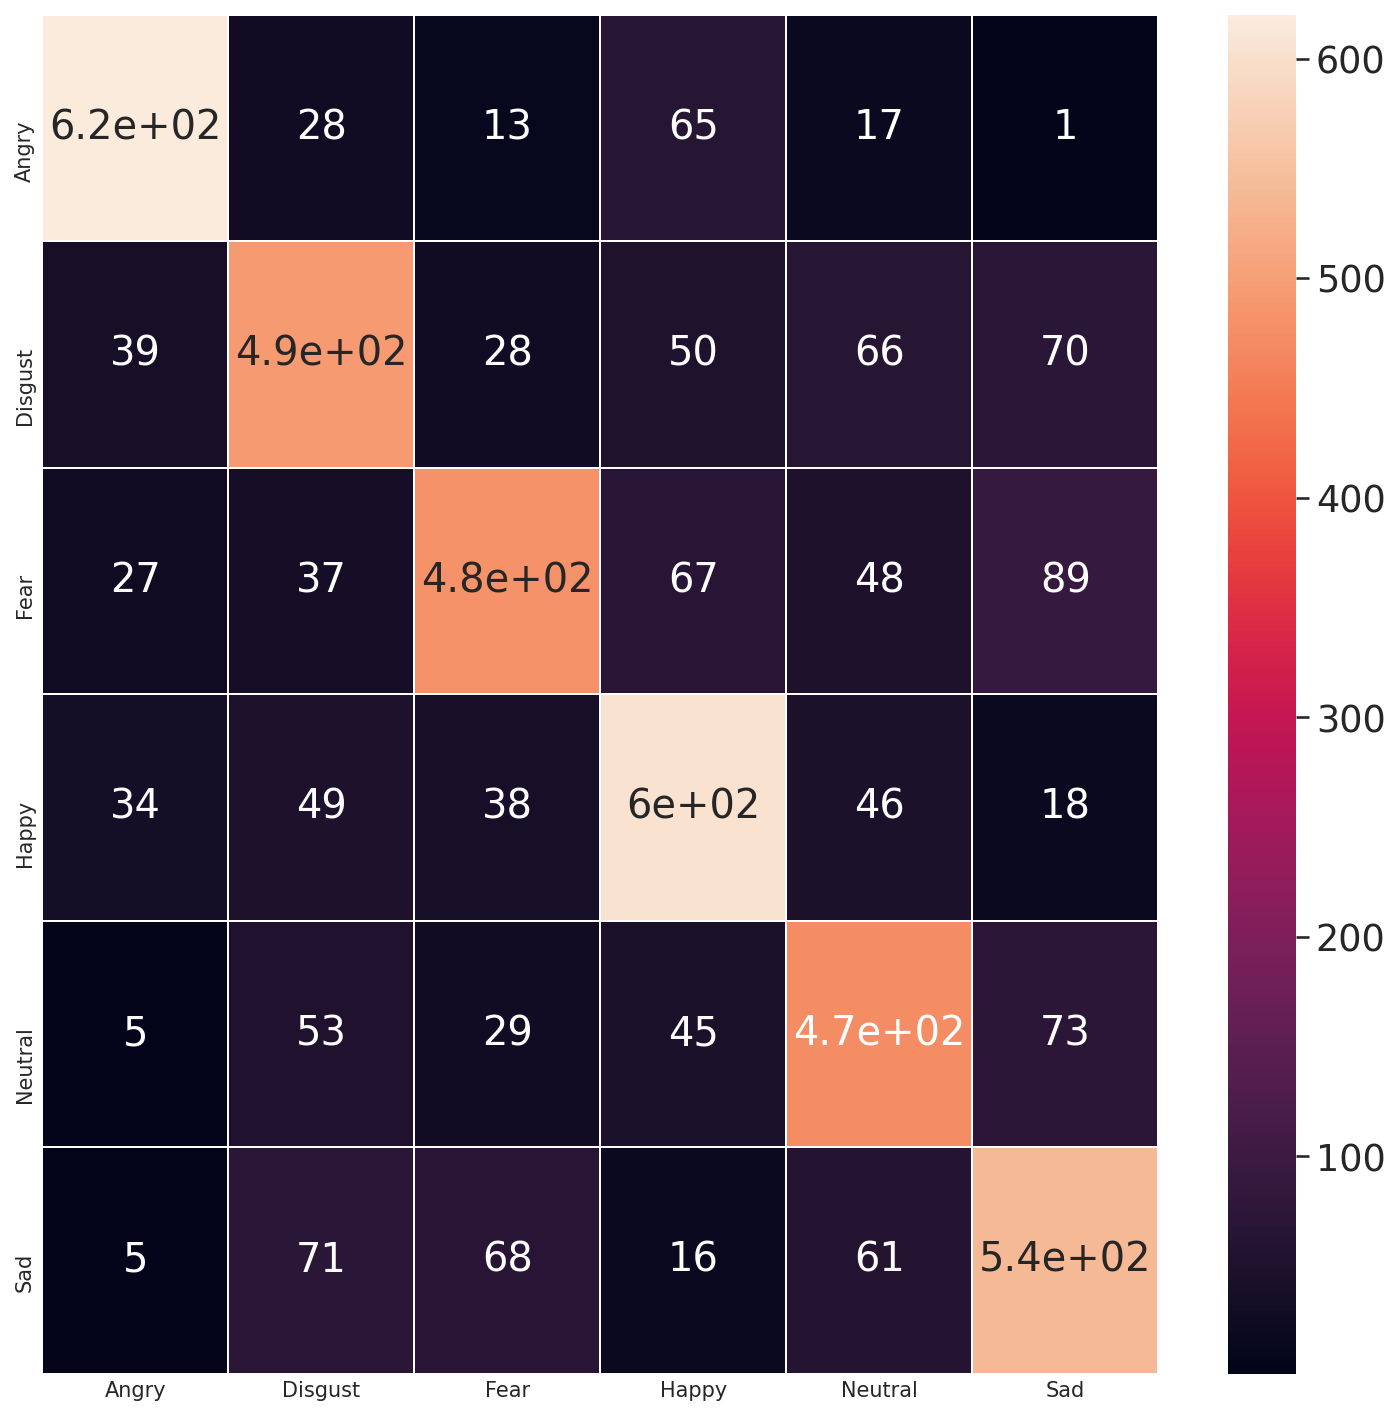

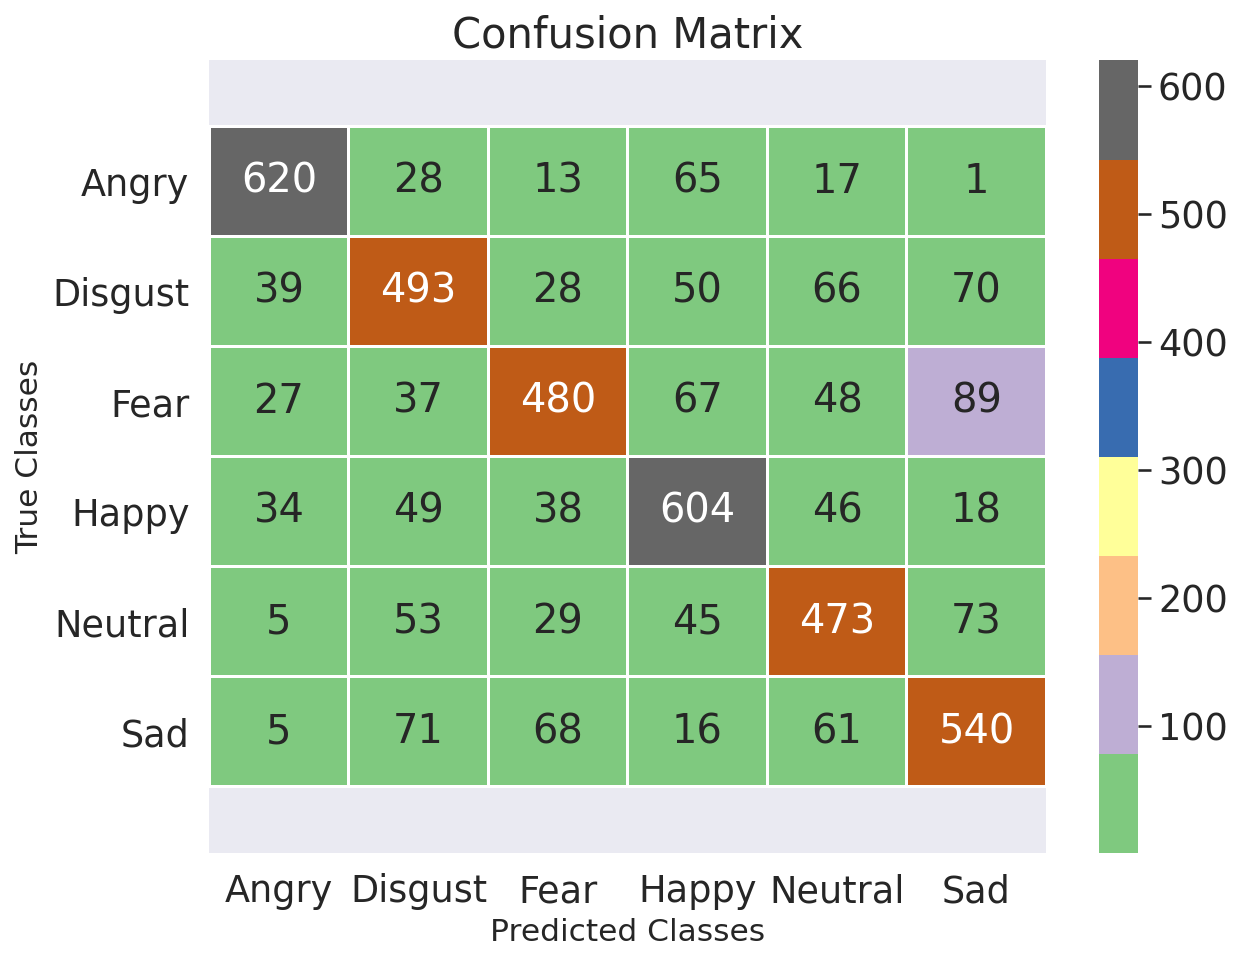

In [40]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Speech Emotion analysis/model1-crema-d.hdf5')
model2 = load_model('/content/drive/MyDrive/Speech Emotion analysis/model2-crema-d.hdf5')
model3 = load_model('/content/drive/MyDrive/Speech Emotion analysis/model3-crema-d.hdf5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict_classes(x_test)
prediction2 = model2.predict_classes(x_test)
prediction3 = model3.predict_classes(x_test)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])         




###########################################################################
### Explore metrics for the ideal weighted ensemble model. 

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('CREMA-D-ENSEMBLE.png')
plt.show() 

In [4]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Speech Emotion analysis/model1-crema-d.hdf5')
model2 = load_model('/content/drive/MyDrive/Speech Emotion analysis/model2-crema-d.hdf5')
model3 = load_model('/content/drive/MyDrive/Speech Emotion analysis/model3-crema-d.hdf5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict_classes(x_test)
prediction2 = model2.predict_classes(x_test)
prediction3 = model3.predict_classes(x_test)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125 
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('CREMA-D  -EMSEMBLE.png')
plt.show() 

NameError: ignored